In [36]:
import os
import sys

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from matplotlib.ticker import MultipleLocator
import nibabel as nib
import pickle
from importlib import reload
import h5py
from nilearn import plotting
import nibabel as nib
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks/construction_work', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [3]:
from funcs.imgproc import get_imgs_designmx, rms_all, feature_df, show_stim, get_rms_contrast, get_rms_contrast_lab, get_contrast_df, get_img_prf, get_visfeature_dict
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict, nsd_R2_dict, rsquare_selection, make_gaussian_2d, find_top_vox, plot_top_vox
from funcs.utility import print_dict_structure, print_large, get_zscore, mean_center, hypotheses_plot, multiple_regression
from funcs.analyses import multivariate_regression, regression_dict_multivariate, plot_roi_beta_distribution, get_hrf_dict, plot_beta_to_icept, reg_plots, univariate_regression, multivariate_regression
from funcs.utility import numpy2coords, coords2numpy, filter_array_by_size, find_common_rows, cap_values, _sort_by_column
# from funcs.viscontrasts import lgn_statistics
from notebooks.alien_nbs.lgnpy.lgnpy.CEandSC import lgn_statistics

In [4]:
# doens't really work
# def reload():
import importlib
import funcs.imgproc
import funcs.rf_tools
import funcs.utility
import funcs.analyses
import notebooks.alien_nbs.lgnpy.lgnpy.CEandSC

# Reload the modules
importlib.reload(funcs.imgproc)
importlib.reload(funcs.rf_tools)
importlib.reload(funcs.utility)
importlib.reload(funcs.analyses)
importlib.reload(notebooks.alien_nbs.lgnpy.lgnpy.CEandSC)

# Re-import the functions
from funcs.imgproc import get_imgs_designmx, rms_all, feature_df, show_stim, get_rms_contrast, get_rms_contrast_lab, get_contrast_df, get_img_prf, get_visfeature_dict
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict, nsd_R2_dict, rsquare_selection, make_gaussian_2d, find_top_vox, plot_top_vox
from funcs.utility import print_dict_structure, print_large, get_zscore, mean_center, hypotheses_plot, multiple_regression
from funcs.analyses import multivariate_regression, regression_dict_multivariate, plot_roi_beta_distribution, get_hrf_dict, plot_beta_to_icept, reg_plots, univariate_regression, multivariate_regression
from funcs.utility import numpy2coords, coords2numpy, filter_array_by_size, find_common_rows, cap_values, _sort_by_column
from notebooks.alien_nbs.lgnpy.lgnpy.CEandSC import lgn_statistics

In [5]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)


Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6


V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 7130
V4_mask
Non-zero voxels in V4_mask: 2846
Subject 7
V1_mask
Non-zero voxels in V1_mask: 6663
V2_mask
Non-zero voxels in V2_mask: 5589
V3_mask
Non-zero voxels in V3_mask: 4213
V4_mask
Non-zero voxels in V4_mask: 2286
Subject 8
V1_mask
Non-zero voxels in V1_mask: 6188
V2_mask
Non-zero voxels in V2_mask: 6003
V3_mask
Non-zero voxels in V3_mask: 5159
V4_mask
Non-zero voxels in V4_mask: 2845


In [6]:
# Load in the original RMS dict (where RMS is calculated before cropping)
with open('./data/custom_files/all_visfeats_rms.pkl', 'rb') as fp:
   visfeats_rms_full_img = pickle.load(fp)
   
# Load in the new RMS dict (where RMS is calculated after cropping, thus cropping prior to RMS)
with open('./data/custom_files/all_visfeats_rms_crop_prior.pkl', 'rb') as fp:
   visfeats_rms_crop_prior = pickle.load(fp)
   
# Load in the Spatial Coherence and Contrast Energy dictionary (this is still where for both the pooling range was 1 degree visual angle)
with open('/home/rfpred/data/custom_files/all_visfeats_scce.pkl', 'rb') as fp:
    visfeats_scce = pickle.load(fp)
    
# Load in the Spatial Coherence and Contrast Energy dictionary (here the pooling range was 2.8 degrees of visual angle, so only look at SC)
with open('/home/rfpred/data/custom_files/all_visfeats_scce_large.pkl', 'rb') as fp:
    visfeats_scce_large = pickle.load(fp)
    
# Load in the .h5 file containing the predictability estimates for subject 01
with h5py.File('/home/rfpred/data/custom_files/subj01/pred/all_predestims.h5', 'r') as hf:
    data = hf.keys()
    predfeats = {key: np.array(hf[key]).flatten() for key in data}

In [7]:
# Load in the saved masks for selected voxels that have their prf inside the inner patch.
with open('./data/custom_files/subj01/prf_mask_center_strict.pkl', 'rb') as fp:
    prf_mask_center_strict = pickle.load(fp)
    
# Load in the saved masks for voxels with pRF inside central 1.25 degrees patch
with open('./data/custom_files/subj01/prf_mask_central_strict_l.pkl', 'rb') as fp:
   prf_mask_center_strict_l = pickle.load(fp)    

# Load in the saved masks for voxels with pRF loosely (at least 50%) inside central 1 degrees patch
with open('./data/custom_files/subj01/prf_mask_central_halfloose.pkl', 'rb') as fp:
   prf_mask_central_halfloose = pickle.load(fp)    

# Load in the saved masks for voxels with pRFs that have their center inside the central 1 degree patch
with open('./data/custom_files/subj01/prf_mask_central_loose.pkl', 'rb') as fp:
    prf_mask_central_loose = pickle.load(fp) 

# Load in the saved masks that have their pRFs exclusively outside the central 1 degree patch
with open('./data/custom_files/subj01/prf_mask_periphery_strict.pkl', 'rb') as fp:
   prf_mask_periphery_strict = pickle.load(fp)
  
  
# THESE ARE TOO SCARCE, ALMOST NO VOXELS ARE LEFT OVER 
# # Load in the prf-based rsquared selections
# with open('/home/rfpred/data/custom_files/subj01/prf_mask_center_strict_prf_rsq.pkl', 'rb') as fp:
#    prf_mask_center_strict_prf_rsq = pickle.load(fp)   

# # Load in the prf-based rsquared selections
# with open('/home/rfpred/data/custom_files/subj01/prf_mask_center_strict_nsd_rsq.pkl', 'rb') as fp:
#    prf_mask_center_strict_nsd_rsq = pickle.load(fp)   

In [8]:
# Get subject-specific T1 anatomical maps to use as base for later overlays
anat_maps = {}
for subject in prf_dict.keys():
    anat_maps[subject] = nib.load(f'/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/{subject}/func1mm/T1_to_func1mm.nii.gz')

{'min': 2.1080575, 'max': 91.11853790283203, 'mean': 9.9507}
{'min': -2.38e-05, 'max': 59.595115661621094, 'mean': 0.86866}


(-0.5, 185.5, 144.5, -0.5)

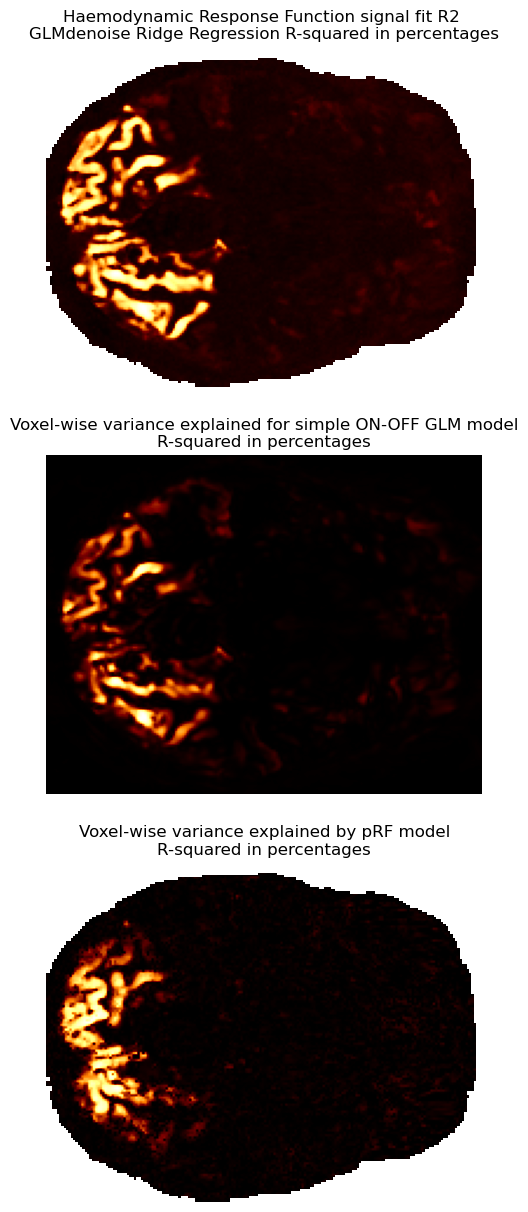

In [9]:
R2_dict_hrf = nsd_R2_dict(vismask_dict, glm_type = 'hrf')
R2_dict_onoff = nsd_R2_dict(vismask_dict, glm_type = 'onoff')

print(R2_dict_hrf['subj01']['full_R2']['R2_range'])
print(R2_dict_onoff['subj01']['full_R2']['R2_range'])
slice = 65

fig,axes = plt.subplots(3,1, figsize = (6,15))
axes[0].imshow(R2_dict_hrf['subj01']['full_R2']['R2_ar'][:,:,slice], cmap = 'afmhot')
axes[0].set_title('Haemodynamic Response Function signal fit R2 \nGLMdenoise Ridge Regression R-squared in percentages')
axes[0].axis('off')
axes[1].imshow(R2_dict_onoff['subj01']['full_R2']['R2_ar'][:,:,slice], cmap = 'afmhot')
axes[1].set_title('Voxel-wise variance explained for simple ON-OFF GLM model\nR-squared in percentages')
axes[1].axis('off')
axes[2].imshow(cap_values(prf_dict['subj01']['nsd_dat']['R2']['prf_ar'], 0, 100)[:,:,slice], cmap = 'afmhot')
axes[2].set_title('Voxel-wise variance explained by pRF model\nR-squared in percentages')
axes[2].axis('off')

In [10]:
prf_rsq_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects, dataset = 'prf')
prf_rsq_dict_mapped = coords2numpy(prf_rsq_dict['subj01']['V1_mask'], shape = vismask_dict['subj01']['V1_mask'].shape, keep_vals = True)
nsd_rsq_dict_hrf = rsquare_selection(R2_dict_hrf, 1000, n_subjects = n_subjects, dataset = 'nsd')
nsd_rsq_dict_onoff = rsquare_selection(R2_dict_onoff, 1000, n_subjects = n_subjects, dataset = 'nsd')

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '



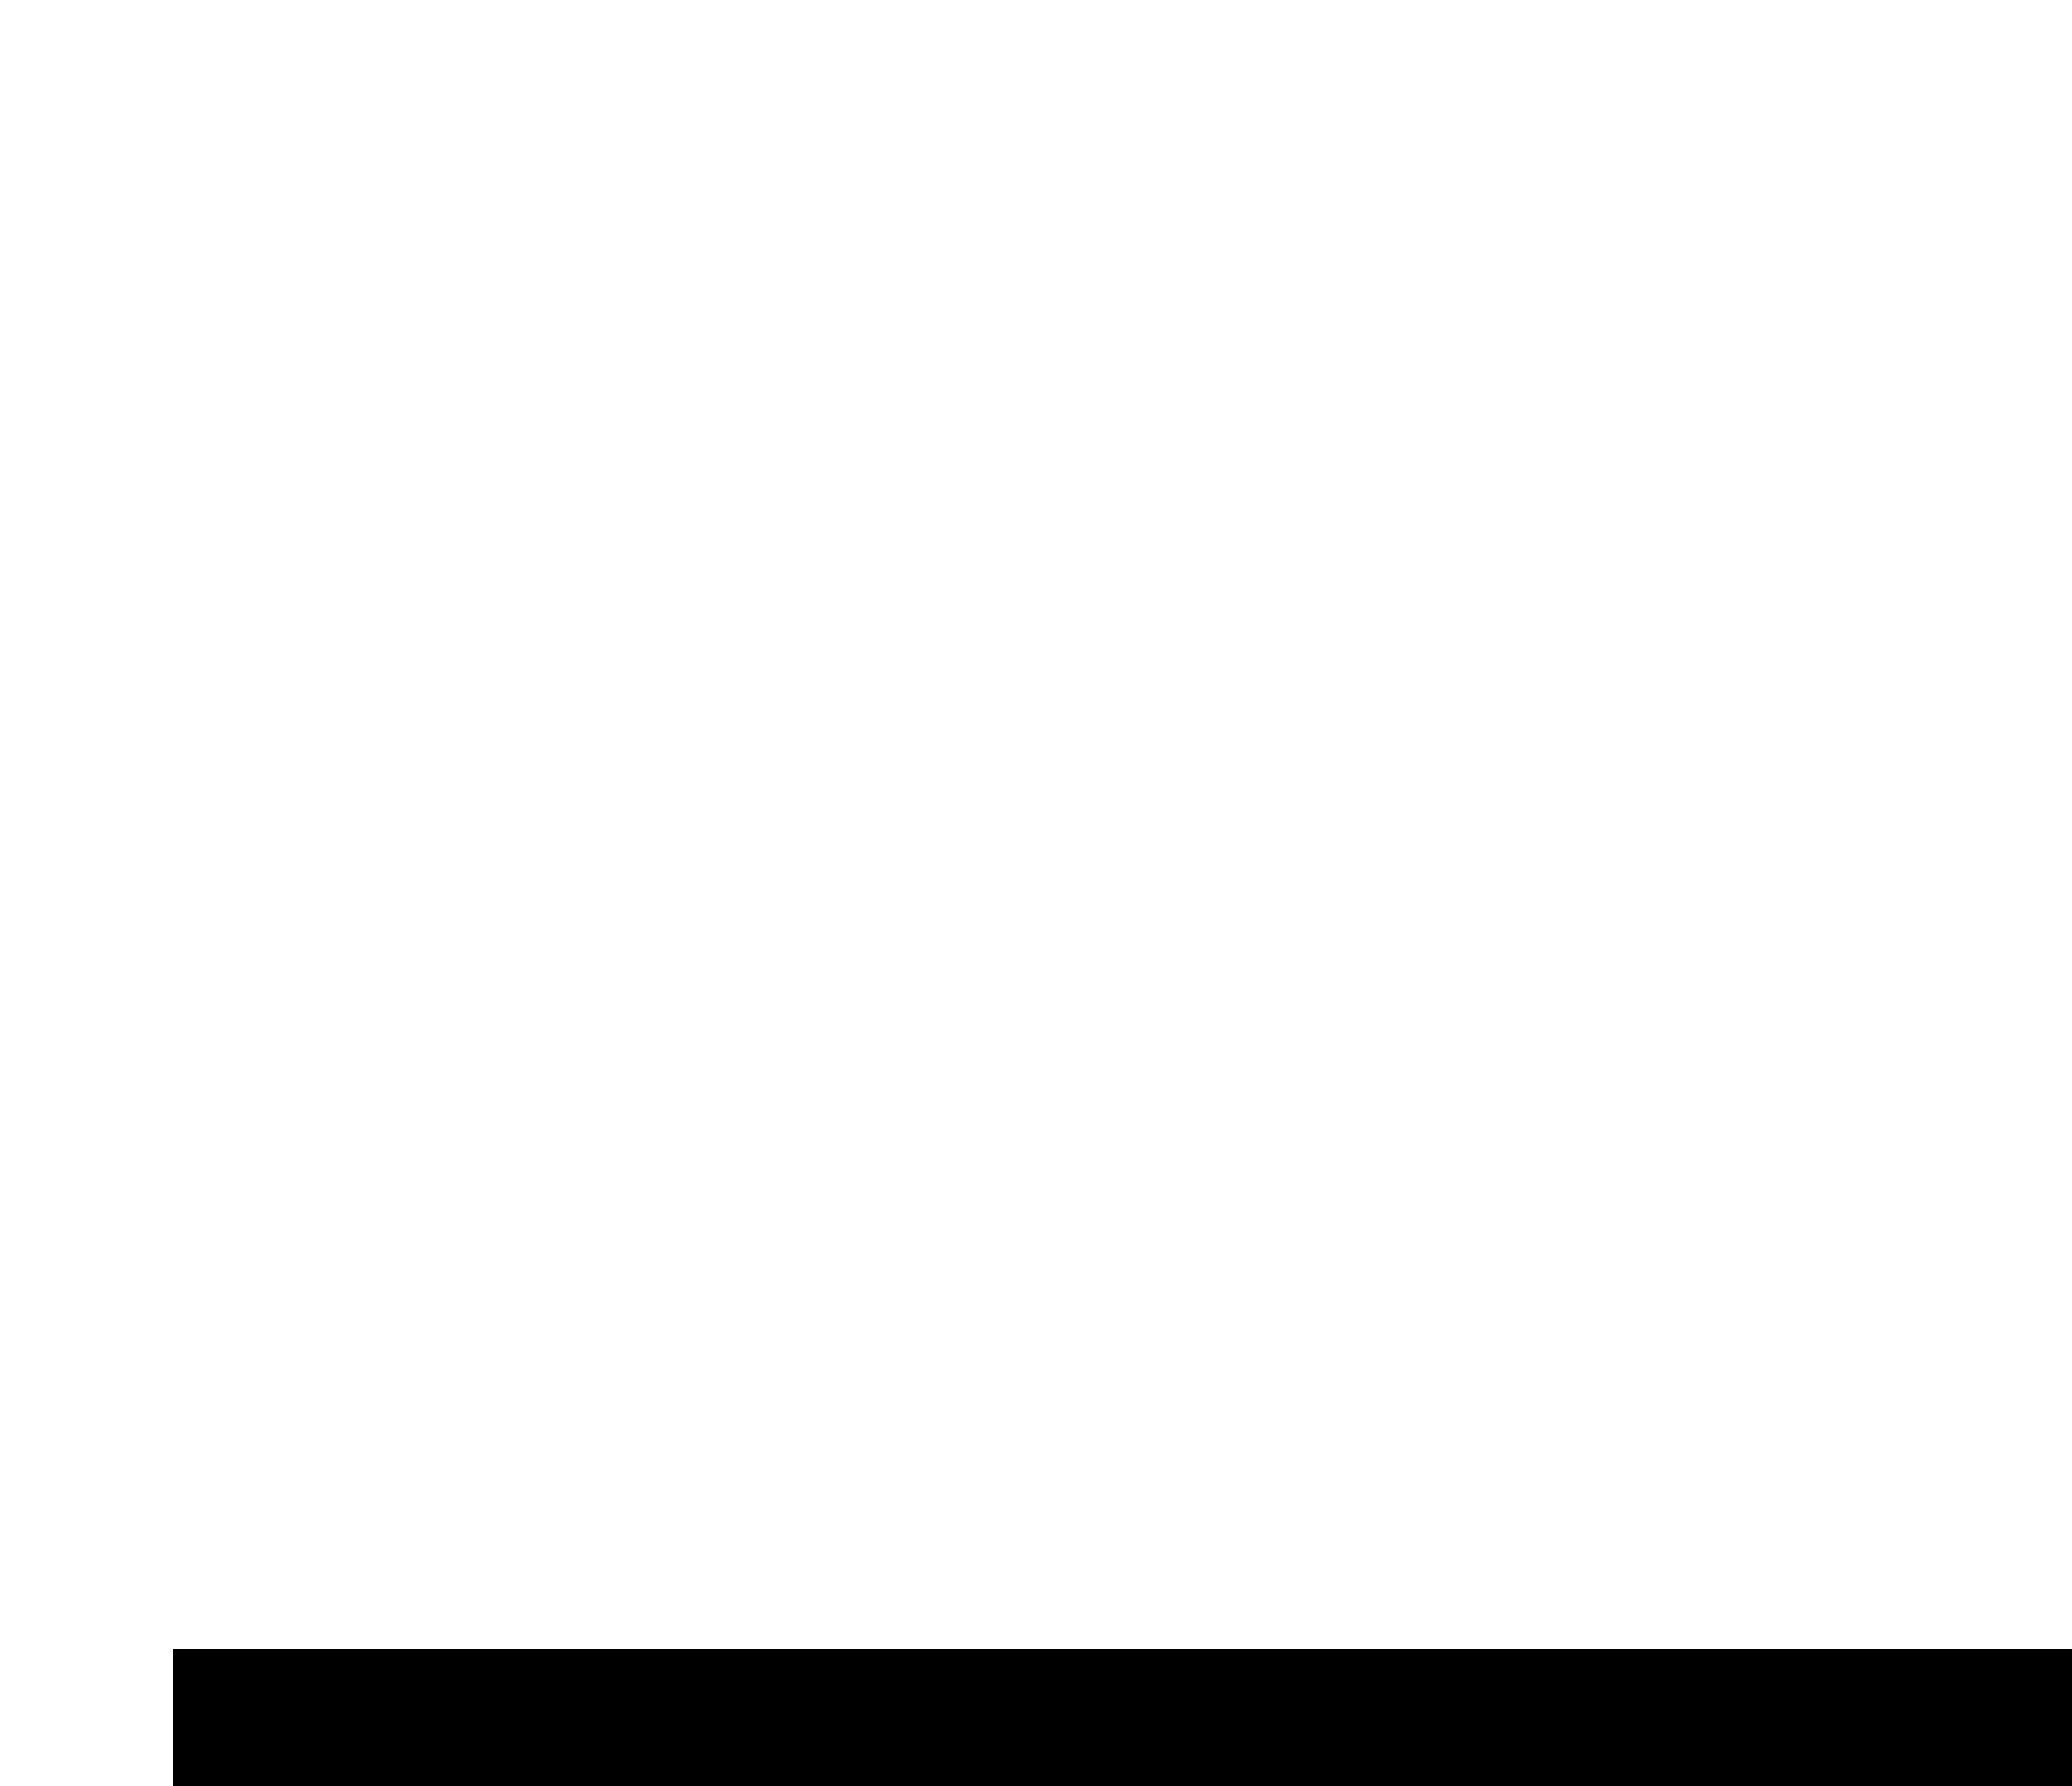
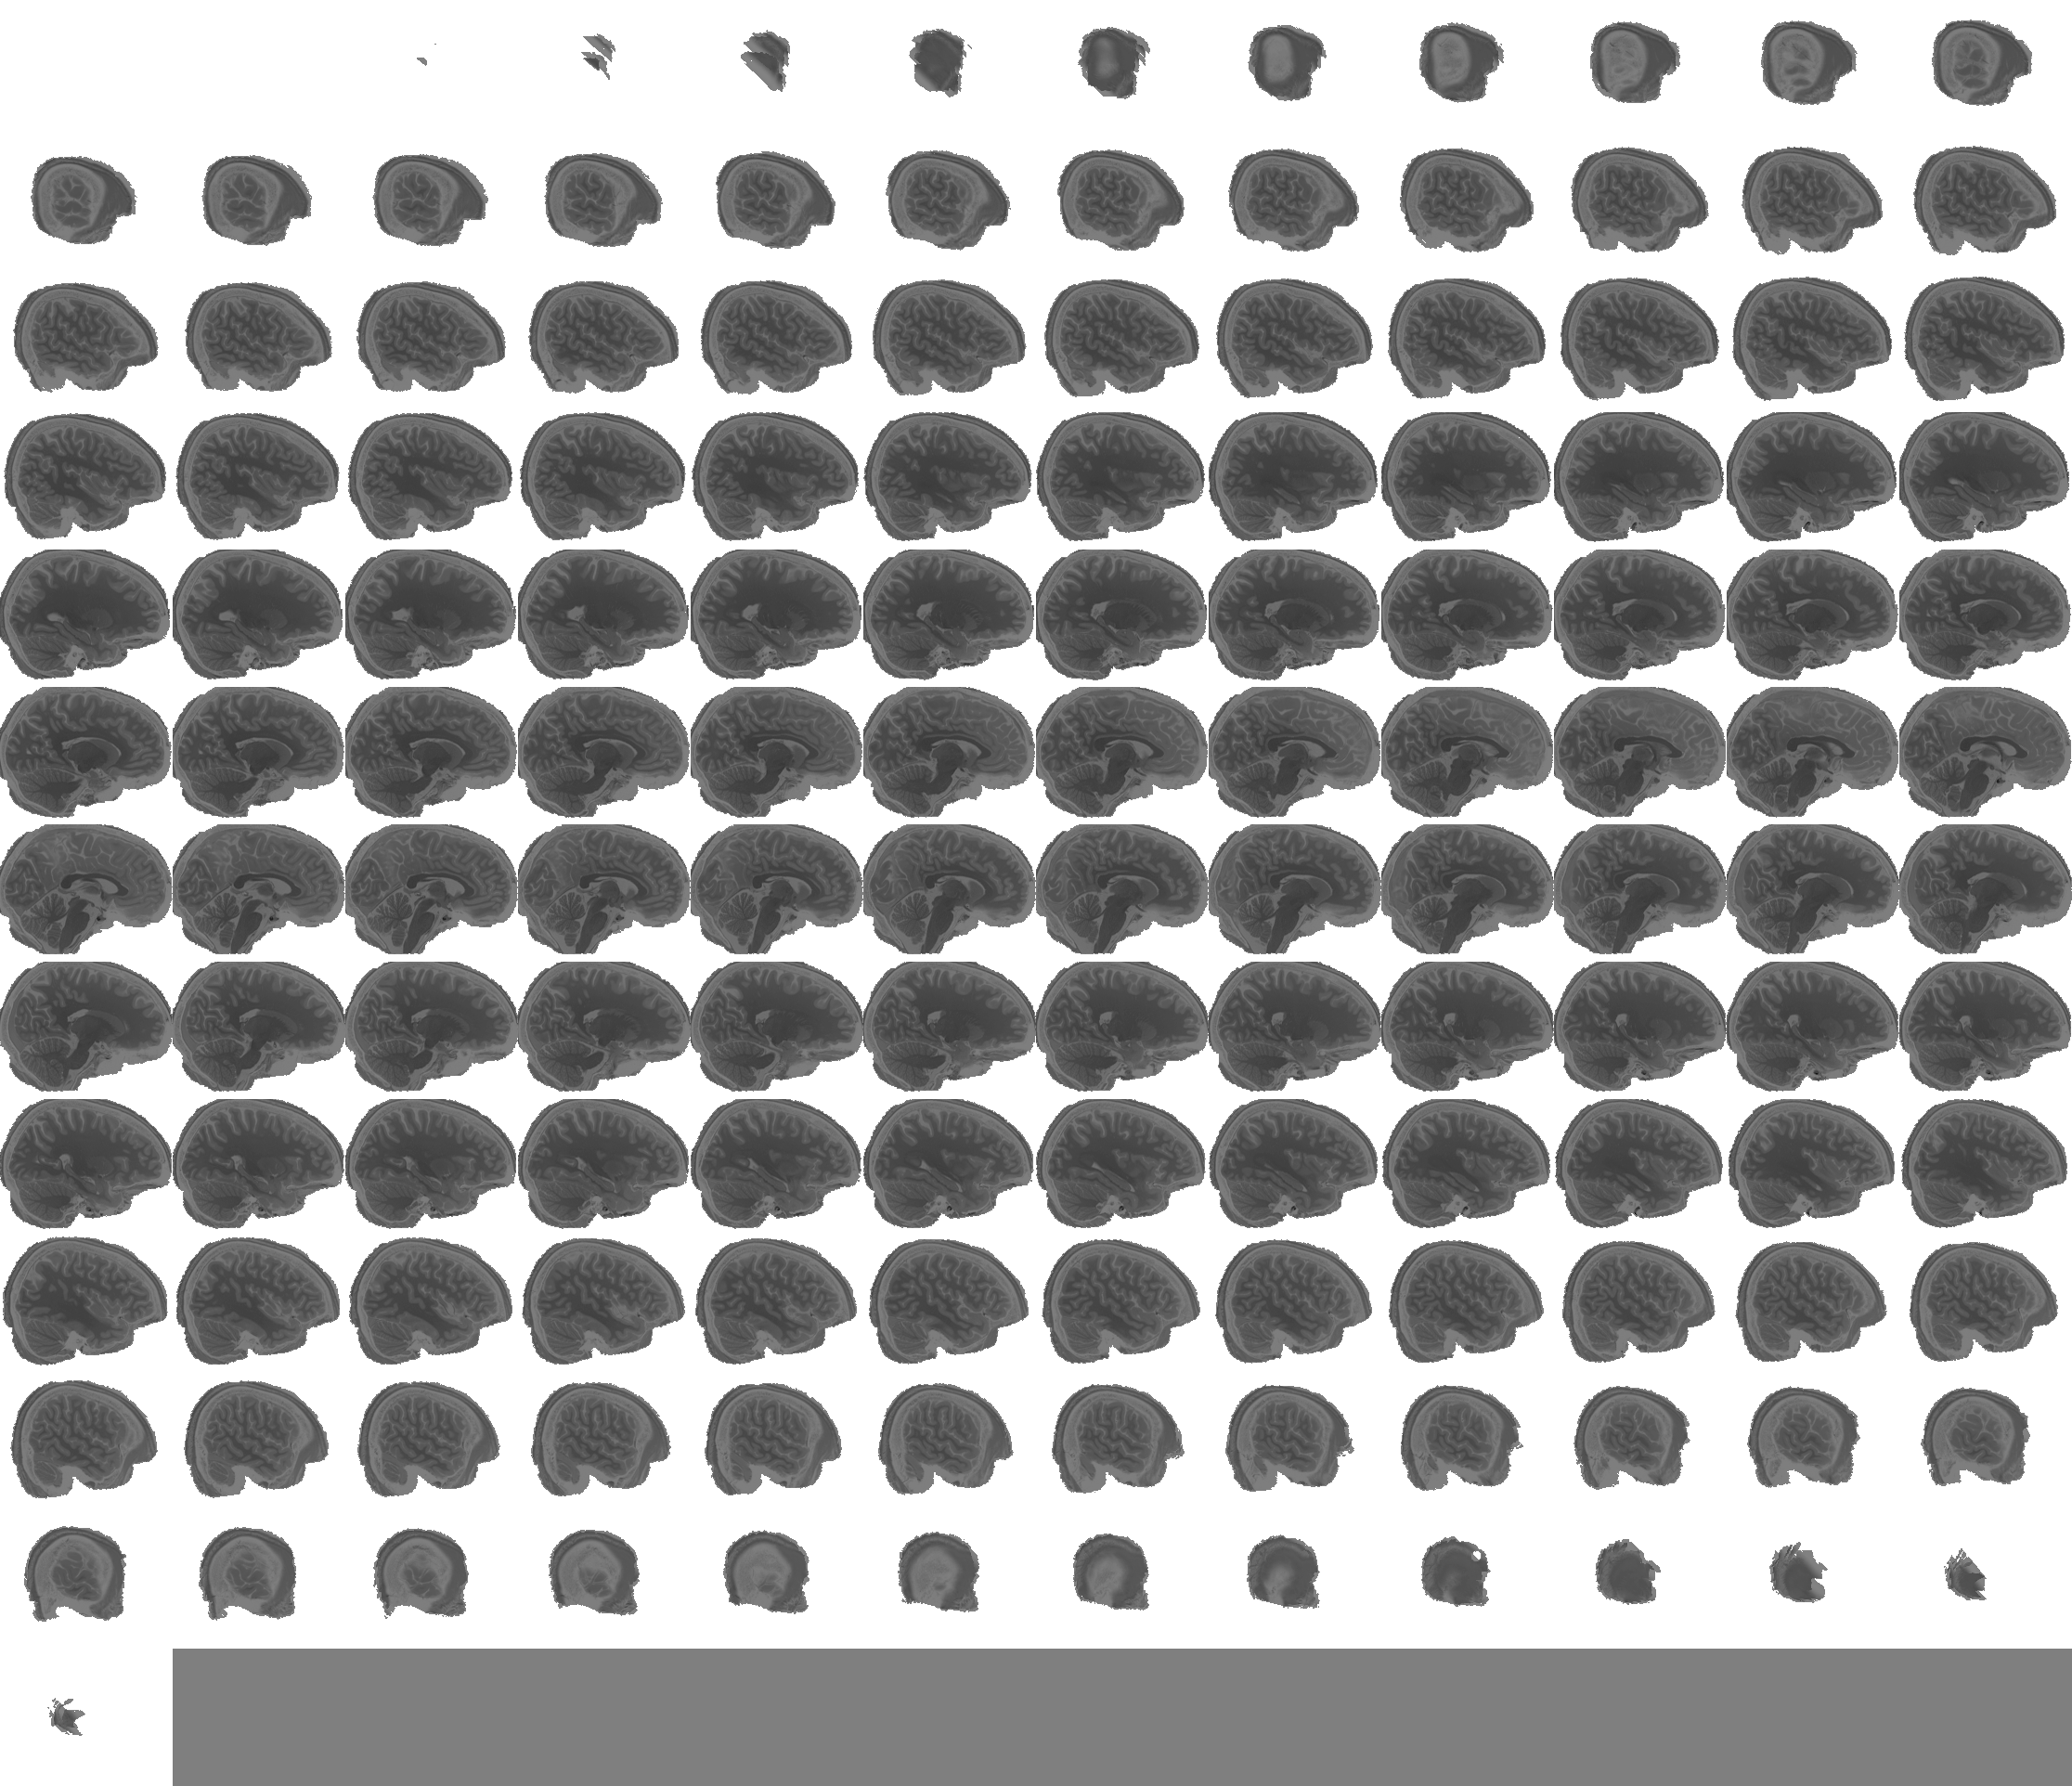

In [11]:
plotting.view_img(anat_maps['subj01'], bg_img=None, cmap='binary', symmetric_cmap=False)


In [12]:
topvoxels = find_top_vox(subject = 'subj01',roi = 'V1', n_voxels = 'all', prf_dict = prf_dict, 
                         vismask_dict = vismask_dict, min_size = .4, max_size = 1, 
                         min_prf_R2 = 0, min_hrf_R2 = 50, min_ecc = 0, max_ecc = 1)

topvoxels

Found 2 voxels in V1


{'voxel0': {'xyz': [96, 15, 80],
  'roi': 'V1',
  'angle': 252.2813262939453,
  'eccentricity': 0.6914103627204895,
  'exponent': 0.006808936130255461,
  'gain': 0.279981791973114,
  'meanvol': 675.1976928710938,
  'R2': 22.870290756225586,
  'size': 0.43205174803733826,
  'nsdR2': 56.437355041503906},
 'voxel1': {'xyz': [99, 14, 82],
  'roi': 'V1',
  'angle': 270.1885986328125,
  'eccentricity': 0.5761739015579224,
  'exponent': 0.04397771880030632,
  'gain': 0.38096171617507935,
  'meanvol': 666.6800537109375,
  'R2': 28.22151756286621,
  'size': 0.4034804105758667,
  'nsdR2': 58.97344207763672}}

#### Now let's have a look at one specific voxel of this topvoxel list

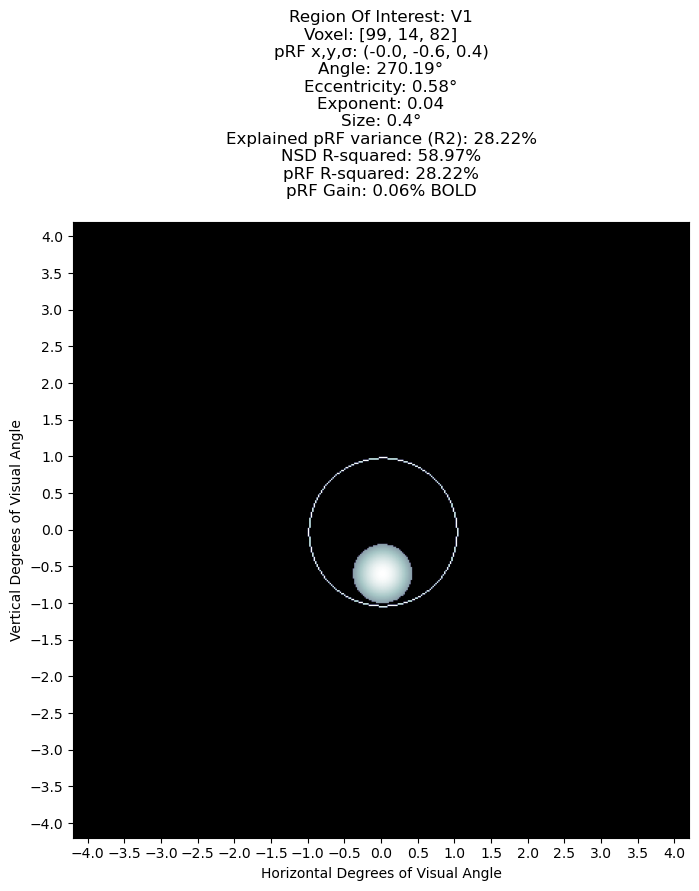

In [18]:
# Which one to inspect:
topvoxno = 1
plot_top_vox(dim = 425, vox_dict_item = topvoxels[f'voxel{topvoxno}'], type = 'cut_gaussian', add_central_patch = True, outline_rad = 1)

##### Chekc what this code was used for, I can't remember bu it might be useful

In [ ]:
# # print(vismask_dict[subject]['V1_mask'].astype('bool'))
# subject = 'subj01'
# mask_viscortex = np.zeros((vismask_dict[subject]['V1_mask'].shape))
# distinct_roi_colours = 'y'
# for roi_factor, roi in enumerate(vismask_dict[subject].keys()):
#     if distinct_roi_colours == 'n':
#         roi_facor = 1
        
#     # mask_viscortex += (cap_values(vismask_dict[subject][roi],1000) * ((roi_factor + 1)**2))
#     mask_viscortex += (cap_values(vismask_dict[subject][roi],0,1000) * ((roi_factor + 1)))


# mask_v1 = vismask_dict[subject]['V1_mask']
# prf_par = 'angle'

# mask_flat = numpy2coords(mask_viscortex)

# brain = cap_values(np.nan_to_num(prf_dict[subject]['nsd_dat'][prf_par]['prf_ar']),4)
# brain_flat = numpy2coords(brain, keep_vals = True)

# comrows = find_common_rows(brain_flat, mask_flat, keep_vals = True)


# # slice_flt = cap_values(coords2numpy(coordinates = comrows, shape = brain.shape, keep_vals = True), threshold = 4)
# slice_flt = coords2numpy(coordinates = comrows, shape = brain.shape, keep_vals = True)

# im = plt.imshow(slice_flt[:,:100,78], cmap = 'inferno')
# plt.colorbar(im)
# plt.axis('off')
# plt.show()

Check the raw beta files

#### "The interpretation of the betas obtained from these GLMs si that they are the BOLD response amplitudes evoked by each stimulus trial relative to the baseline signal level present during the absence of a stimulus ("gray screen"). Note that betas are expressed in percent signal change by dividing the full set of amplitudes obtained for a voxel by the grand mean intensity observed for that voxel in a given scan session and then multiplying by 100."

In [14]:
session_np = nib.load(f'/home/rfpred/data/natural-scenes-dataset/nsddata_betas/ppdata/subj01/func1mm/betas_fithrf_GLMdenoise_RR/betas_session01.nii.gz').get_fdata(caching='unchanged')

#### The plot below is not very informative because the betas have not been scaled to be expressed in the percent signal change unit. However, doing this scaling for the entire beta set would crash any processor, so this should be done in later stages only.

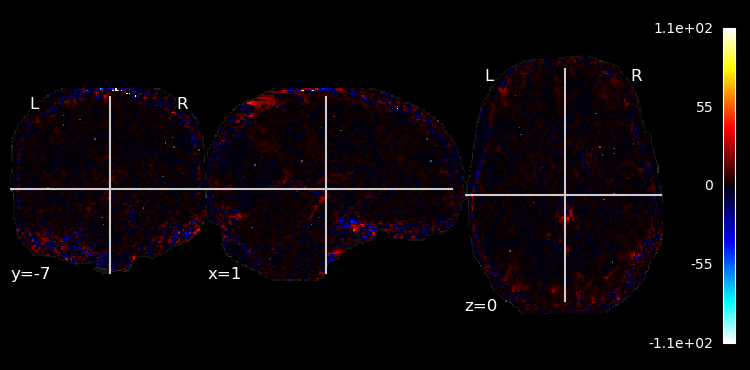

In [160]:
trial_img = 100
beta_trial = nib.Nifti1Image((session_np[:,:,:,trial_img]/300), anat_maps['subj01'].affine)
# beta_trial = nib.Nifti1Image((session_np[:,:,:,trial_img]), anat_maps['subj01'].affine)
beta_trial_np = beta_trial.get_fdata(caching='unchanged')
# anat_sub1_sm_nii = nib.Nifti1Image(anat_sub1_sm, anat_sub1.affine)

# Plot static view for coronal, sagittal and axial view
plotting.plot_stat_map(beta_trial, bg_img=anat_maps['subj01'], display_mode='ortho', colorbar=True)

# plotting.view_img(beta_trial, bg_img=None, cmap='CMRmap', symmetric_cmap=True)

In [174]:
hrf_dict_tight['subj01']['V1_mask']['voxel10']['xyz']


np.max(session_np[57,12,62]/300)

Original array: 2.276666666666667
Z-scores: nan


/home/rfpred/funcs/utility.py:24: RuntimeWarning: invalid value encountered in scalar divide
  z_scores = (data - mean_value) / std_dev


8.45

0.9197394378102922
0.33537300000000003
Original array: [-334. -317.  580.  603.  288.  176.  323.  236.  255.  460. -290. -440.
  679.  205.  881.  522.  390.  595.  785.  829.  729. 1259.  449. 1040.
  360.  871. 1333.  654.  311. 1105.  872.   18.  759.  514.  412.  242.
  591.  465.  807.  363.  871.  486.  -73.  806.  793.  245. 1032.   39.
  432.  708.]
Z-scores: [-2.11238 -2.06923  0.20713  0.2655  -0.53389 -0.81812 -0.44507 -0.66586
 -0.61764 -0.0974  -2.00071 -2.38138  0.45837 -0.74453  0.971    0.05994
 -0.27504  0.2452   0.72737  0.83903  0.58526  1.93027 -0.12531  1.3745
 -0.35117  0.94562  2.11806  0.39493 -0.47552  1.53945  0.94816 -1.21909
  0.66139  0.03964 -0.21921 -0.65063  0.23505 -0.08471  0.7832  -0.34356
  0.94562 -0.03142 -1.45002  0.78066  0.74767 -0.64302  1.3542  -1.16579
 -0.16846  0.53196]


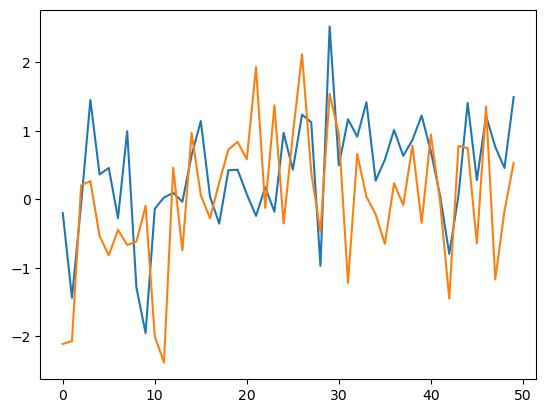

In [176]:
rawbetas_s1 = (hrf_dict_tight['subj01']['V1_mask']['voxel10']['hrf_betas'])
print(np.std(rawbetas_s1))
print(np.mean(rawbetas_s1))

# plt.hist(rawbetas_s1, bins = 50)
# plt.hist(beta_trial_np[57, 12, 62], bins = 50)

plt.plot(get_zscore(rawbetas_s1, 'n')[:50])
plt.plot(get_zscore(session_np[57,12,62,:50]))

In [145]:
print(np.max(beta_trial_np))
print(np.min(beta_trial_np))

109.22333333333333
-109.22666666666667


In [17]:
# Find some nice voxels:
topvoxels['voxel0']['xyz']

[96, 15, 80]

1.1740533333333334
1.0
-4.7369515717340015e-17


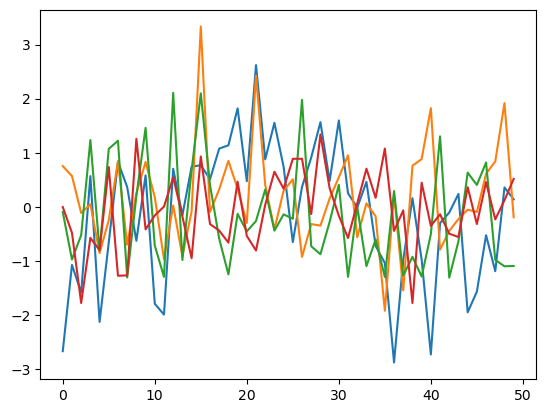

In [132]:
V1_voxel = [64,8,77] # This is one from V1
random_voxel = [70,8,40] 
top_voxel = topvoxels['voxel1']['xyz'] # This is one selected for high hrf R2, and minimum of .5 radius pRF
n_trials = 50
# Which one to use?
this_voxel = top_voxel
voxel_betas = session_np[this_voxel[0],this_voxel[1],this_voxel[2],:]/300
# plt.plot(voxel_betas[:100])

print(np.mean(voxel_betas))

# plt.imshow(mean_betas_s1_ses1[:,:,60], cmap = 'gist_heat')
# plt.axis('off')

# Here I apply the scaling of the betas, so they are expressed in percent signal change units.
# To do so you need to divide all separate betas by the grand mean intensity and multiply by 100
voxel_betas_scaled = (voxel_betas / np.mean(voxel_betas)) * 100
y = get_zscore(voxel_betas_scaled, print_ars = 'n') # Scale them to z scores so they match the scale of the visual features

plt.plot(y[:n_trials])
# print(voxel_betas_scaled)

# Get some visual feat values for these specific trials
Xrms = visfeats_rms_crop_prior['subj01']['rms']['rms_z']
Xce = visfeats_scce['subj01']['scce']['ce_z']
Xsc = visfeats_scce_large['subj01']['scce']['sc_z']

# Which visual feature to use:
X = np.vstack((Xrms, Xce, Xsc))
for i in range(X.shape[0]):
    plt.plot(X[i,:n_trials])

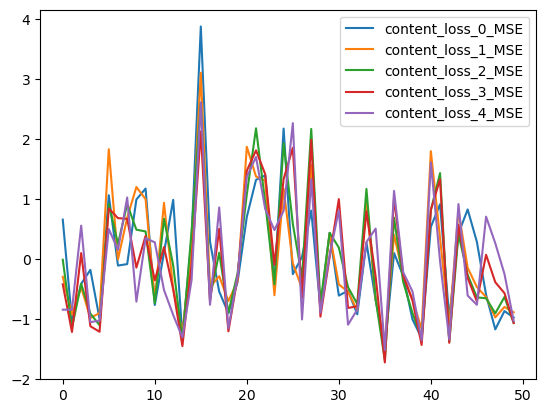

In [105]:
Xpred0_MSE = predfeats['content_loss_0_MSE']
Xpred1_MSE = predfeats['content_loss_1_MSE']
Xpred2_MSE = predfeats['content_loss_2_MSE']
Xpred3_MSE = predfeats['content_loss_3_MSE']
Xpred4_MSE = predfeats['content_loss_4_MSE']

Xpred = np.vstack((Xpred0_MSE, Xpred1_MSE, Xpred2_MSE, Xpred3_MSE, Xpred4_MSE))
loss = 'MSE'

for i in range(5):
    plt.plot(get_zscore(predfeats[f'content_loss_{i}_{loss}'][:n_trials], print_ars = 'n'), label=f'content_loss_{i}_MSE')

plt.legend()  # Display the legend
plt.show()  # Display the plot

(750, 5)
(750, 1)


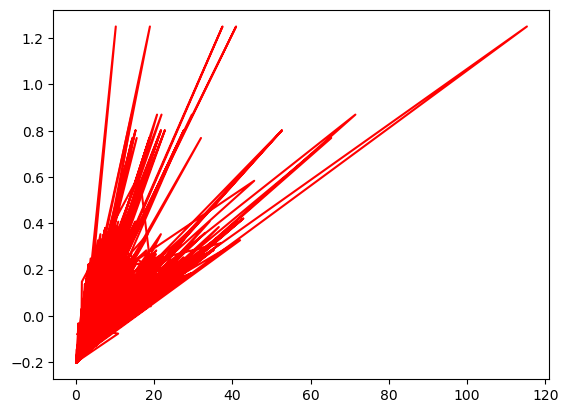

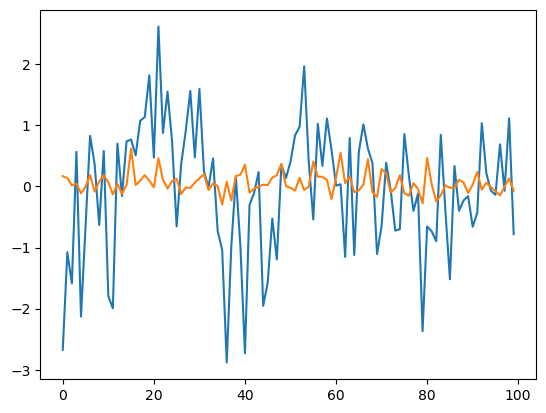

In [114]:
# plt.scatter(y[:750], Xrms[:750])
from sklearn.linear_model import LinearRegression
# Reshape Xrms and y to 2D arrays because sklearn expects 2D inputs
# X = np.array(Xrms[:750]).reshape(-1, 1)
X = Xpred[:,:750].T
print(X.shape)
y = y.reshape(-1, 1)
print(y.shape)

# Create a PLSRegression object
PLSmodel = PLSRegression(n_components=1)
OLSmodel = LinearRegression()

# Fit the model to the data
PLSmodel.fit(X, y)
OLSmodel.fit(X, y)


# Use the model to predict y values
y_hat_PLS = PLSmodel.predict(X)
y_hat_OLS = OLSmodel.predict(X)


# Perform 5-fold cross-validation and get predicted y values
kf = KFold(n_splits=3)

y_hat_cv_PLS = cross_val_predict(PLSmodel, X, y, cv=kf)
y_hat_cv_OLS = cross_val_predict(OLSmodel, X, y, cv=kf)


# Plot the original data
# plt.scatter(X, y)

# Plot the fitted line
plt.plot(X, y_hat_PLS, color='red')
# plt.plot(X, y_hat_OLS, color='green')

# Show the plot
plt.show()

# print(y_hat_cv)


# Calculate the residuals
residuals = y - y_hat_cv_PLS
residuals = y - y_hat_cv_OLS


plt.plot(y[:100])
plt.plot(y_hat_cv[:100])

R-squared Lasso: 0.05066426871705976
R-squared Ridge: 0.05087477621627767
R-squared PLS: 0.05087469460279359
R-squared OLS: 0.050874830861490805


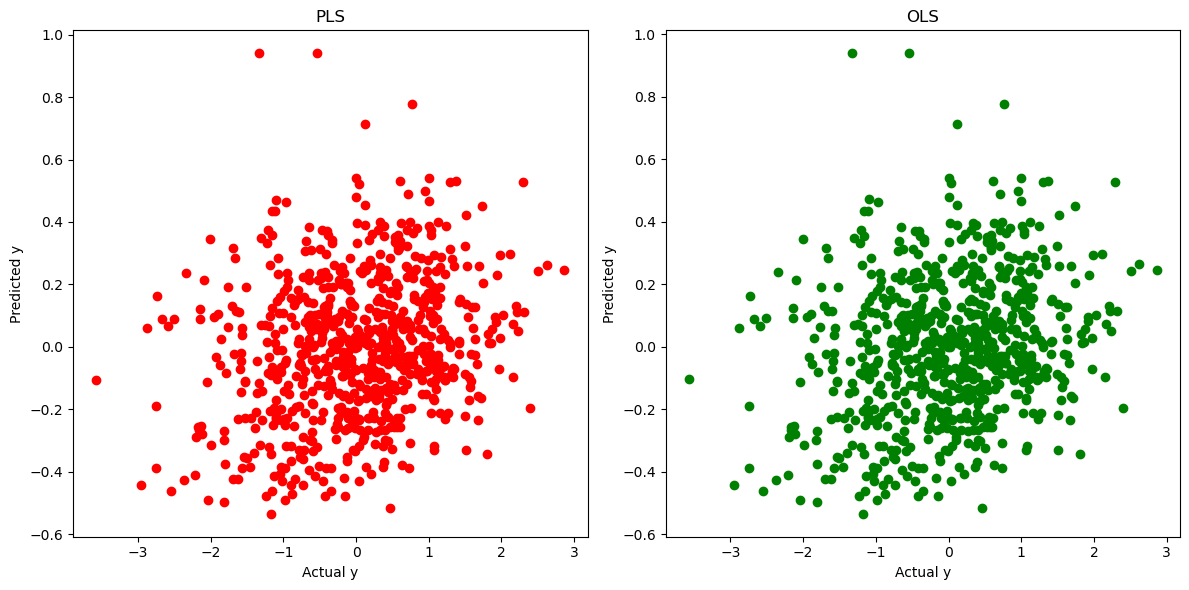

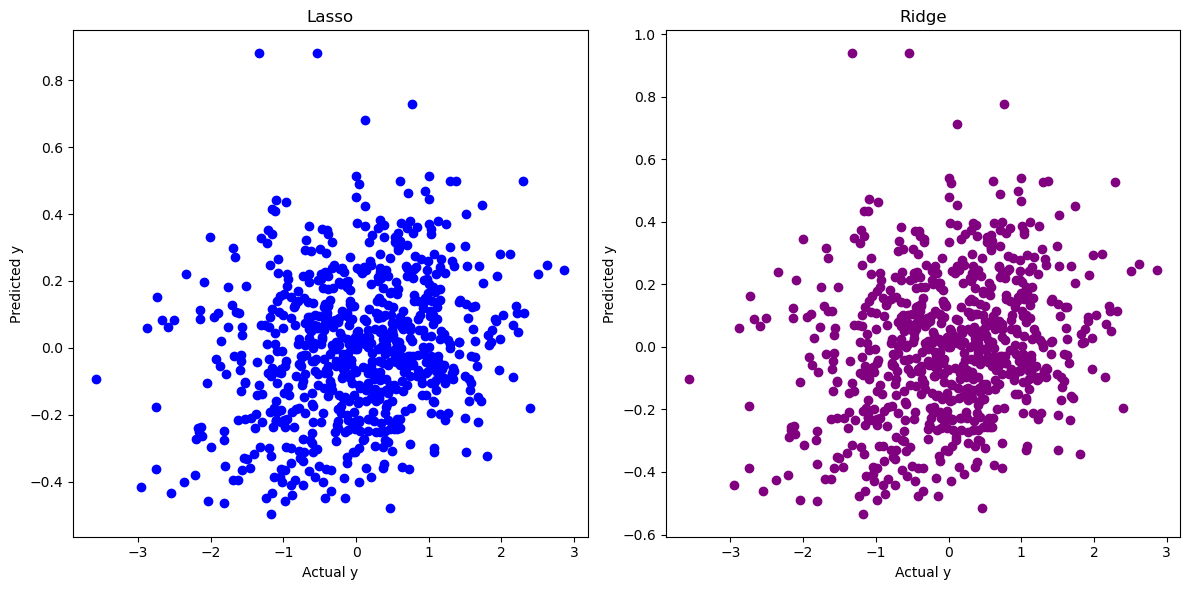

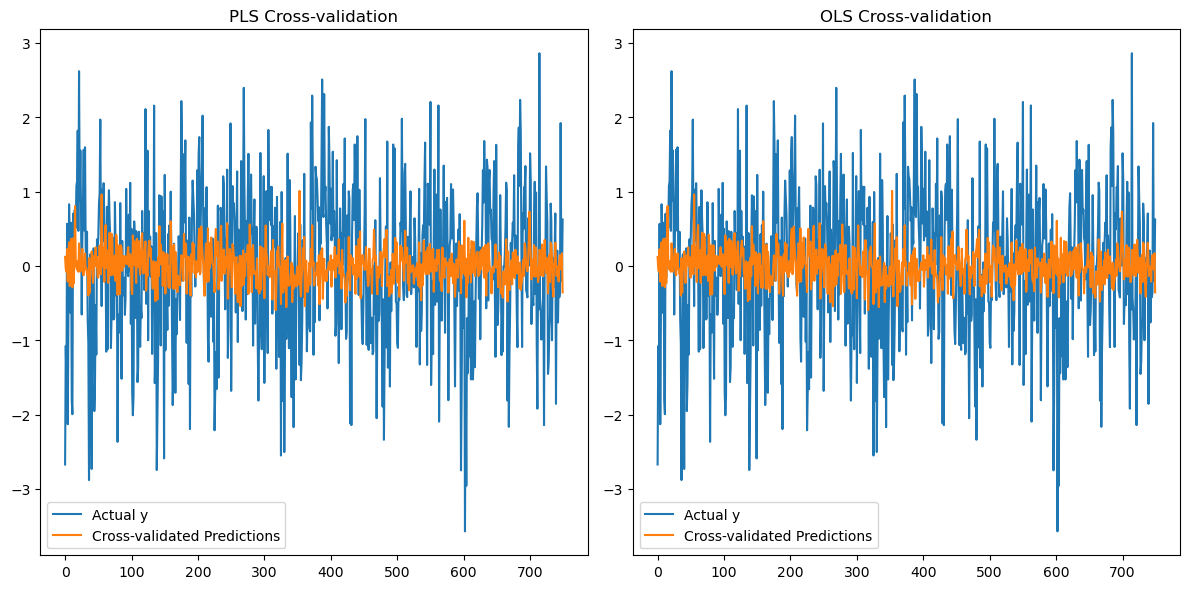

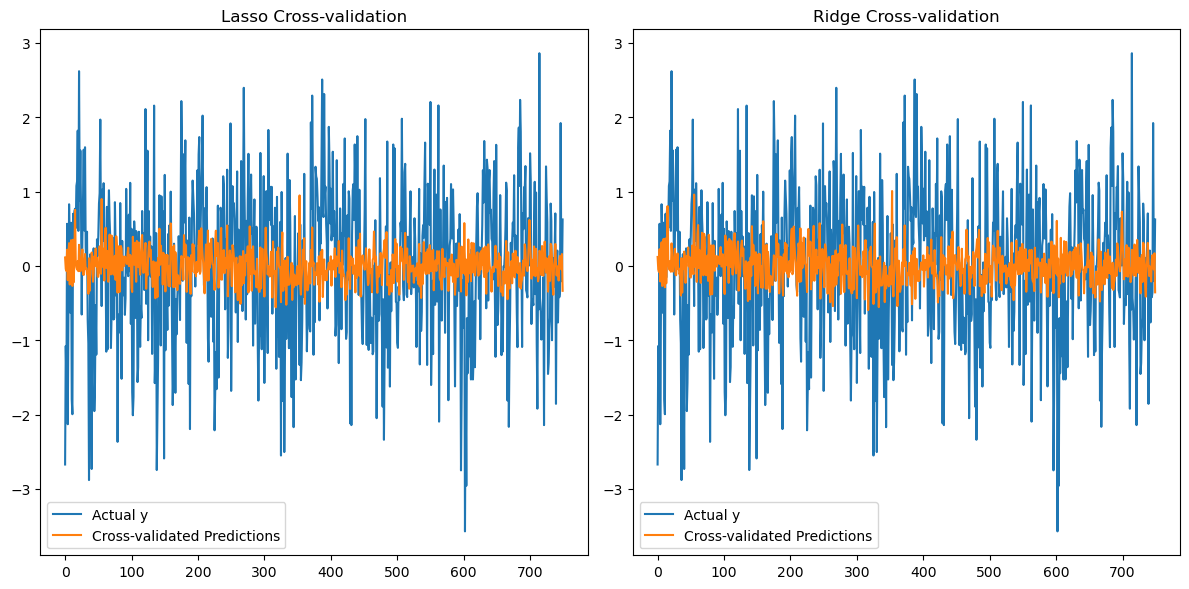

In [137]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Reshape X and y to 2D arrays because sklearn expects 2D inputs
# X = Xpred[:,:750].T
X = np.vstack((Xrms, Xce, Xsc))[:,:750].T
y = y.reshape(-1, 1)

# Create a PLSRegression object and an OLS object
PLSmodel = PLSRegression(n_components=2)
OLSmodel = LinearRegression()
# Create Lasso and Ridge objects
LassoModel = Lasso(alpha = 0.01)
RidgeModel = Ridge()

# Fit the models to the data
PLSmodel.fit(X, y)
OLSmodel.fit(X, y)
LassoModel.fit(X, y)
RidgeModel.fit(X, y)

# Use the models to predict y values
y_hat_PLS = PLSmodel.predict(X)
y_hat_OLS = OLSmodel.predict(X)
y_hat_Lasso = LassoModel.predict(X)
y_hat_Ridge = RidgeModel.predict(X)

# Perform 5-fold cross-validation and get predicted y values
kf = KFold(n_splits=3)
y_hat_cv_PLS = cross_val_predict(PLSmodel, X, y, cv=kf)
y_hat_cv_OLS = cross_val_predict(OLSmodel, X, y, cv=kf)
y_hat_cv_Lasso = cross_val_predict(LassoModel, X, y, cv=kf)
y_hat_cv_Ridge = cross_val_predict(RidgeModel, X, y, cv=kf)

# Calculate R-squared values
r2_Lasso = r2_score(y, y_hat_Lasso)
r2_Ridge = r2_score(y, y_hat_Ridge)
print(f'R-squared Lasso: {r2_Lasso}')
print(f'R-squared Ridge: {r2_Ridge}')


# Calculate R-squared values
r2_PLS = r2_score(y, y_hat_PLS)
r2_OLS = r2_score(y, y_hat_OLS)
print(f'R-squared PLS: {r2_PLS}')
print(f'R-squared OLS: {r2_OLS}')

# Plot actual y values against predicted y values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, y_hat_PLS, color='red')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('PLS')

plt.subplot(1, 2, 2)
plt.scatter(y, y_hat_OLS, color='green')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('OLS')

plt.tight_layout()
plt.show()

# Plot actual y values against predicted y values for Lasso and Ridge
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, y_hat_Lasso, color='blue')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Lasso')

plt.subplot(1, 2, 2)
plt.scatter(y, y_hat_Ridge, color='purple')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Ridge')

plt.tight_layout()
plt.show()

# Plot cross-validation results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y, label='Actual y')
plt.plot(y_hat_cv_PLS, label='Cross-validated Predictions')
plt.legend()
plt.title('PLS Cross-validation')

plt.subplot(1, 2, 2)
plt.plot(y, label='Actual y')
plt.plot(y_hat_cv_OLS, label='Cross-validated Predictions')
plt.legend()
plt.title('OLS Cross-validation')

plt.tight_layout()
plt.show()

# Plot cross-validation results for Lasso and Ridge
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y, label='Actual y')
plt.plot(y_hat_cv_Lasso, label='Cross-validated Predictions')
plt.legend()
plt.title('Lasso Cross-validation')

plt.subplot(1, 2, 2)
plt.plot(y, label='Actual y')
plt.plot(y_hat_cv_Ridge, label='Cross-validated Predictions')
plt.legend()
plt.title('Ridge Cross-validation')

plt.tight_layout()
plt.show()

PLS R-squared: 0.051
OLS R-squared: 0.051
Cross-validated PLS R-squared: 0.042
Cross-validated OLS R-squared: 0.042


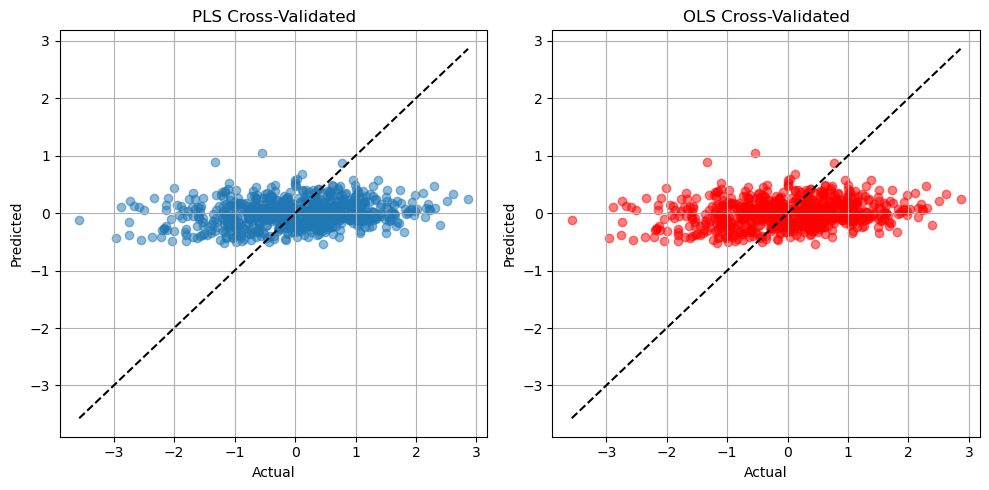

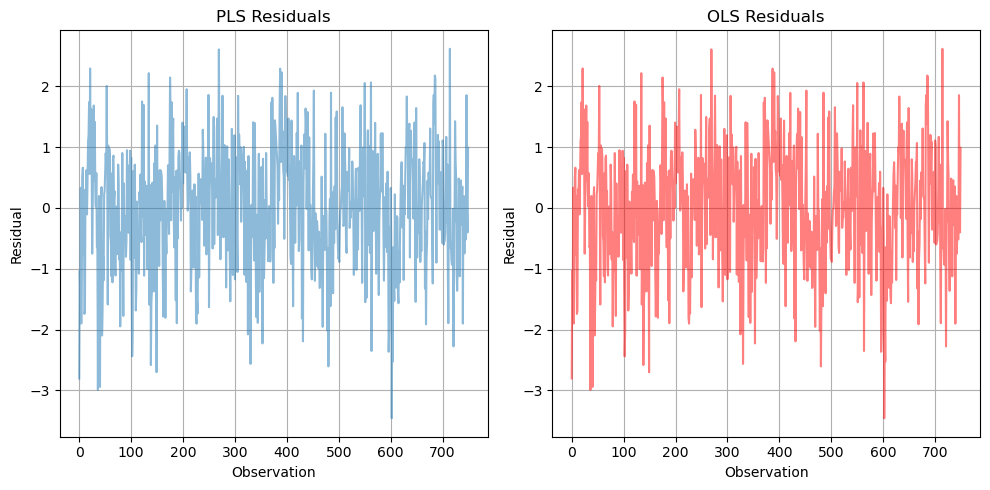

In [129]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming Xpred and y are already defined in your workspace

# Reshape X and y to 2D arrays because sklearn expects 2D inputs
# X = Xpred[:, :750].T

y = y.reshape(-1, 1)

# Create a PLSRegression and LinearRegression objects
PLSmodel = PLSRegression(n_components=3)
OLSmodel = LinearRegression()

# Fit the models to the data
PLSmodel.fit(X, y)
OLSmodel.fit(X, y)

# Use the models to predict y values
y_hat_PLS = PLSmodel.predict(X)
y_hat_OLS = OLSmodel.predict(X)

# Perform 5-fold cross-validation and get predicted y values
kf = KFold(n_splits=5)
y_hat_cv_PLS = cross_val_predict(PLSmodel, X, y, cv=kf)
y_hat_cv_OLS = cross_val_predict(OLSmodel, X, y, cv=kf)

# Calculate and print the R-squared values for PLS and OLS models
r2_PLS = r2_score(y, y_hat_PLS)
r2_OLS = r2_score(y, y_hat_OLS)
print(f"PLS R-squared: {r2_PLS:.3f}")
print(f"OLS R-squared: {r2_OLS:.3f}")

# Calculate the R-squared values for cross-validated PLS and OLS models
r2_cv_PLS = r2_score(y, y_hat_cv_PLS)
r2_cv_OLS = r2_score(y, y_hat_cv_OLS)
print(f"Cross-validated PLS R-squared: {r2_cv_PLS:.3f}")
print(f"Cross-validated OLS R-squared: {r2_cv_OLS:.3f}")

# Plot the actual vs predicted values for PLS model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, y_hat_cv_PLS, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('PLS Cross-Validated')
plt.grid(True)

# Plot the actual vs predicted values for OLS model
plt.subplot(1, 2, 2)
plt.scatter(y, y_hat_cv_OLS, alpha=0.5, color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS Cross-Validated')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and plot the residuals for PLS and OLS models
residuals_PLS = y - y_hat_cv_PLS
residuals_OLS = y - y_hat_cv_OLS

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(residuals_PLS, alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('PLS Residuals')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(residuals_OLS, alpha=0.5, color='r')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('OLS Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Now do this but for all the betas, takes a bit longer but helps me see whether the problem has to do with having too little datapoints.

In [5]:
import ipywidgets as widgets
from IPython.display import display

def viscortex_plot(prf_dict, vismask_dict, plot_param, subject, distinct_roi_colours:bool = True, inv_colour:bool = False, cmap = 'hot',
                   lowcap = None, upcap = None):

    mask_viscortex = np.zeros((vismask_dict[subject]['V1_mask'].shape))
    
    # Loop over all rois to create a mask of them conjoined
    for roi_factor, roi in enumerate(vismask_dict[subject].keys()):
        if distinct_roi_colours:
            roi_facor = 1
        mask_viscortex += (cap_values(vismask_dict[subject][roi], lower_threshold = lowcap, upper_threshold = upcap) * ((roi_factor + 1)))

    mask_flat = numpy2coords(mask_viscortex, keep_vals = True)

    if plot_param == 'nsdR2':
        R2_dict = nsd_R2_dict(vismask_dict, glm_type = 'hrf')
        brain = cap_values(np.nan_to_num(R2_dict[subject]['full_R2']['R2_ar']), lower_threshold = lowcap, upper_threshold = upcap)
    else:
        brain = cap_values(np.nan_to_num(prf_dict[subject]['nsd_dat'][plot_param]['prf_ar']), lower_threshold = lowcap, upper_threshold = upcap)
    brain_flat = numpy2coords(brain, keep_vals = True)

    comrows = find_common_rows(brain_flat, mask_flat, keep_vals = True)

    # slice_flt = cap_values(coords2numpy(coordinates = comrows, shape = brain.shape, keep_vals = True), threshold = 4)
    slice_flt = coords2numpy(coordinates = comrows, shape = brain.shape, keep_vals = True)

    # Create sliders for each dimension
    z_slider = widgets.IntSlider(min=0, max=slice_flt.shape[2]-1, description='saggital')
    x_slider = widgets.IntSlider(min=0, max=slice_flt.shape[0]-1, description='horizontal:')
    # y_slider = widgets.IntSlider(min=0, max=slice_flt.shape[1]-1, description='coronal')
    y_slider = widgets.IntSlider(min=6, max=40, description='coronal')

    if inv_colour:
        rev = '_r'
    else:
        rev = ''

    # Function to update the plot
    def _update_plot(x, y, z):
        # Create a new figure with 2 subplots
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Adjust the size as needed

        # Plot the first image on the left subplot
        img1 = np.rot90(mask_viscortex[:x, y, :z])
        im1 = axs[0].imshow(img1, cmap=f'{cmap}{rev}', vmin=np.min(mask_viscortex), vmax=np.max(mask_viscortex))
        axs[0].axis('off')
        cbar1 = fig.colorbar(im1, ax=axs[0])
        cbar1.set_ticks([1,2,3,4])  # Set tick positions
        cbar1.set_ticklabels(['V1', 'V2', 'V3', 'V4'])  # Set tick labels

        # Plot the second image on the right subplot
        img2 = np.rot90(slice_flt[:x, y, :z])
        im2 = axs[1].imshow(img2, cmap=f'{cmap}{rev}', vmin=np.min(brain), vmax=np.max(brain))
        axs[1].set_title(f'{plot_param} across visual cortex')
        axs[1].axis('off')
        fig.colorbar(im2, ax=axs[1])

        plt.show()
        
    widgets.interact(_update_plot, x=slice_flt.shape[0]-1, y=y_slider, z=slice_flt.shape[2]-1)
    
viscortex_plot(prf_dict = prf_dict, vismask_dict = vismask_dict, plot_param = 'size', subject = 'subj08', upcap = 1, lowcap = 0, inv_colour = False, cmap = 'gist_stern')

interactive(children=(IntSlider(value=142, description='x', max=426, min=-142), IntSlider(value=6, description…

In [102]:
import ipywidgets as widgets
from IPython.display import display

def viscortex_plot(prf_dict, vismask_dict, plot_param, subject, distinct_roi_colours:bool = True, inv_colour:bool = False, cmap = 'hot',
                   lowcap = None, upcap = None):

    mask_viscortex = np.zeros((vismask_dict[subject]['V1_mask'].shape))
    
    # Loop over all rois to create a mask of them conjoined
    for roi_factor, roi in enumerate(vismask_dict[subject].keys()):
        if distinct_roi_colours:
            roi_facor = 1
        mask_viscortex += (cap_values(vismask_dict[subject][roi], lower_threshold = lowcap, upper_threshold = upcap) * ((roi_factor + 1)))

    mask_flat = numpy2coords(mask_viscortex, keep_vals = True)

    if plot_param == 'nsdR2':
        R2_dict = nsd_R2_dict(vismask_dict, glm_type = 'hrf')
        brain = cap_values(np.nan_to_num(R2_dict[subject]['full_R2']['R2_ar']), lower_threshold = lowcap, upper_threshold = upcap)
    else:
        brain = cap_values(np.nan_to_num(prf_dict[subject]['nsd_dat'][plot_param]['prf_ar']), lower_threshold = lowcap, upper_threshold = upcap)
    brain_flat = numpy2coords(brain, keep_vals = True)

    comrows = find_common_rows(brain_flat, mask_flat, keep_vals = True)

    # slice_flt = cap_values(coords2numpy(coordinates = comrows, shape = brain.shape, keep_vals = True), threshold = 4)
    slice_flt = coords2numpy(coordinates = comrows, shape = brain.shape, keep_vals = True)

    # Create sliders for each dimension
    z_slider = widgets.IntSlider(min=0, max=slice_flt.shape[2]-1, description='saggital')
    x_slider = widgets.IntSlider(min=0, max=slice_flt.shape[0]-1, description='horizontal:')
    # y_slider = widgets.IntSlider(min=0, max=slice_flt.shape[1]-1, description='coronal')
    y_slider = widgets.IntSlider(min=6, max=40, description='coronal')

    if inv_colour:
        rev = '_r'
    else:
        rev = ''

    # Function to update the plot
    def _update_plot(x, y, z):
        # Create a new figure with 2 subplots
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Adjust the size as needed

        # Plot the first image on the left subplot
        img1 = np.rot90(mask_viscortex[:x, y, :z])
        im1 = axs[0].imshow(img1, cmap=f'{cmap}{rev}', vmin=np.min(mask_viscortex), vmax=np.max(mask_viscortex))
        axs[0].axis('off')
        cbar1 = fig.colorbar(im1, ax=axs[0])
        cbar1.set_ticks([1,2,3,4])  # Set tick positions
        cbar1.set_ticklabels(['V1', 'V2', 'V3', 'V4'])  # Set tick labels

        # Plot the second image on the right subplot
        img2 = np.rot90(slice_flt[:x, y, :z])
        im2 = axs[1].imshow(img2, cmap=f'{cmap}{rev}', vmin=np.min(brain), vmax=np.max(brain))
        axs[1].set_title(f'{plot_param} across visual cortex')
        axs[1].axis('off')
        fig.colorbar(im2, ax=axs[1])

        plt.show()
        
    widgets.interact(_update_plot, x=slice_flt.shape[0]-1, y=y_slider, z=slice_flt.shape[2]-1)
    
viscortex_plot(prf_dict = prf_dict, vismask_dict = vismask_dict, plot_param = 'nsdR2', subject = 'subj02', upcap = 100, lowcap = 0, inv_colour = False, cmap = 'gist_heat')

interactive(children=(IntSlider(value=145, description='x', max=435, min=-145), IntSlider(value=6, description…

[[67.       6.      68.      28.19995]
 [74.      13.      83.      28.2006 ]
 [67.      10.      72.      28.21646]
 ...
 [69.      10.      77.      46.42923]
 [71.      10.      77.      46.42925]
 [70.      10.      77.      48.11262]]
[[ 55.        7.       77.        3.61605]
 [ 55.       11.       75.       11.14883]
 [ 56.        7.       76.        2.09502]
 ...
 [106.       20.       80.        5.85023]
 [107.       18.       80.      -20.66737]
 [107.       19.       80.        1.99449]]
(145, 186, 148)


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


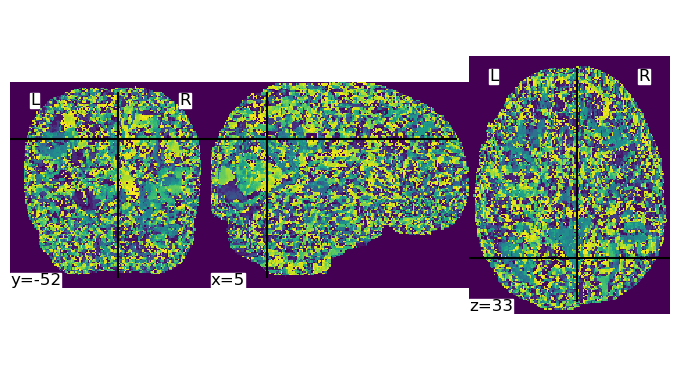

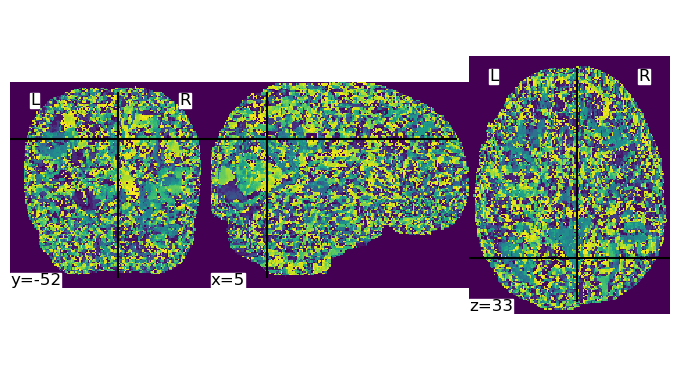

In [30]:
import mne
# Load the NIfTI image
img = prf_dict['subj01']['nsd_dat']['angle']['prf_dat']

# Plot the NIfTI image
plotting.plot_img(img)
plotting.show()

# Get the image data as a numpy array
data = img.get_fdata()

# Replace NaN values with zeros
data = np.nan_to_num(data)

# Create a new NIfTI image with the modified data
new_img = nib.Nifti1Image(data, img.affine, img.header)

# Now you can use new_img in place of img

# Plot the NIfTI image
plotting.plot_img(new_img)
plotting.show()

609.0


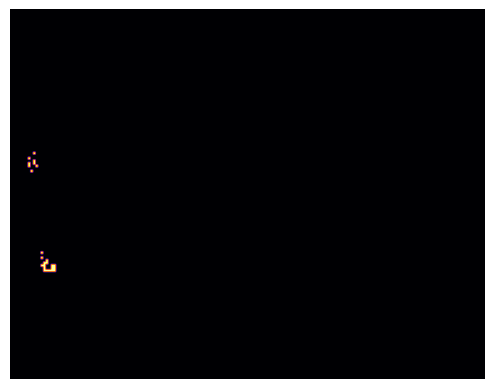

In [58]:
np.sum(vismask_dict['subj01']['V1_mask'])
plt.imshow(prf_mask_center_strict['subj01']['V1_mask'][:,:,77], cmap = 'inferno')
plt.axis('off')
print(np.sum(prf_mask_center_strict['subj01']['V1_mask']))

In [148]:
rawbetas_s1 = (hrf_dict_tight['subj01']['V1_mask']['voxel10']['hrf_betas'])
print(np.std(rawbetas_s1))
print(np.mean(rawbetas_s1))

0.9197394378102922
0.33537300000000003


beta_dict1_2_center_strict.pkl
	Amount of voxels in V1: 316
	Amount of voxels in V2: 609
	Amount of voxels in V3: 609
	Amount of voxels in V4: 480
	Processed images: 1500
beta_dict3_39_center_strict.pkl
	Amount of voxels in V1: 316
	Amount of voxels in V2: 609
	Amount of voxels in V3: 609
	Amount of voxels in V4: 480
	Processed images: 29250
beta_dict40_40_center_strict.pkl
	Amount of voxels in V1: 316
	Amount of voxels in V2: 609
	Amount of voxels in V3: 609
	Amount of voxels in V4: 480
	Processed images: 30000


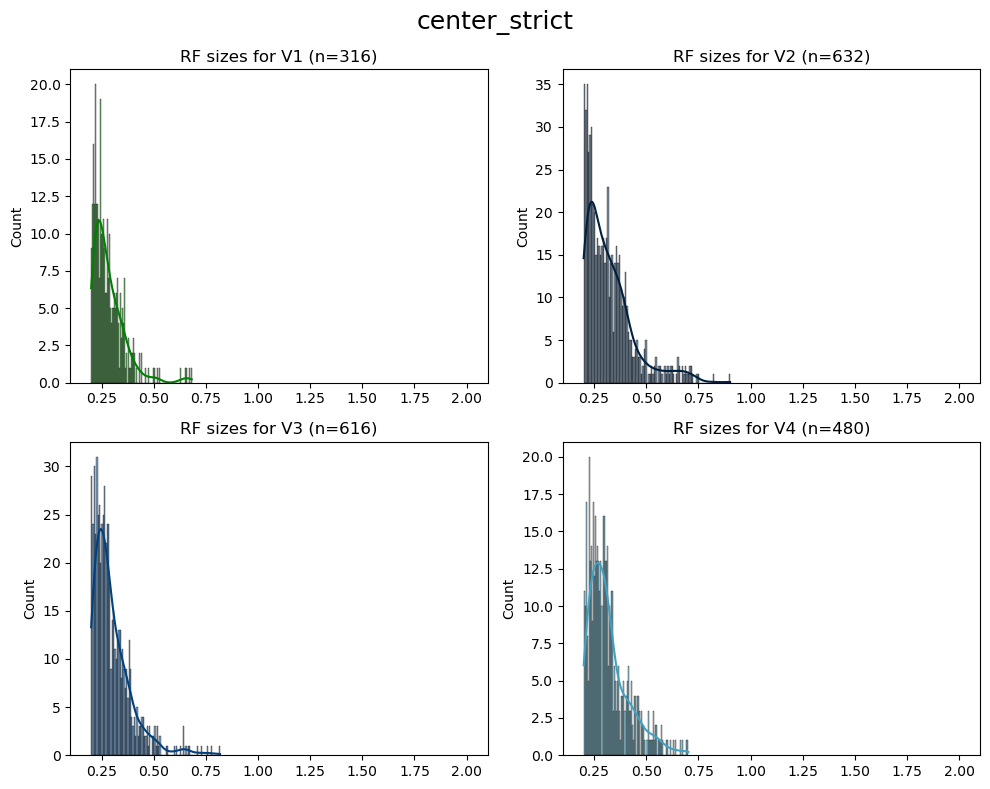

In [138]:
# 1 min
# hrf_dict_tight, voxmask_tight, joint_voxs, sizes  = get_hrf_dict('subj01', voxels = prf_mask_center_strict, prf_region = 'center_strict', 
#                                              min_size = .25, max_size = 1, prf_proc_dict = prf_dict, vox_n_cutoff = 150,plot_sizes = 'y')

hrf_dict_tight, voxmask_tight, joint_voxs, sizes, bsesh  = get_hrf_dict('subj01', voxels = prf_mask_center_strict, prf_region = 'center_strict', 
                                             min_size = .2, max_size = 2, prf_proc_dict = prf_dict, vox_n_cutoff = None ,plot_sizes = 'y')



In [23]:
# load in nifti file
# anat_sub1 = nib.load('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/subj01/func1mm/T1_to_func1mm.nii.gz')
# img = nib.load('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/subj01/anat/T1_1pt0_masked.nii.gz')
# plot the nifti file using nilearn
# plotting.plot_img(img)
# plotting.view_img(anat_sub1, bg_img=None, cmap='binary', symmetric_cmap=True)
# plotting.plot_anat(img, cut_coords=[50, 50, 50])


R2_np = coords2numpy(R2_dict_hrf['subj01']['R2_roi']['V1_mask'], shape = R2_dict_hrf['subj01']['full_R2']['R2_ar'].shape,keep_vals = True)
R2_nii = nib.Nifti1Image(R2_np, anat_maps['subj01'].affine)


(145, 186, 148)



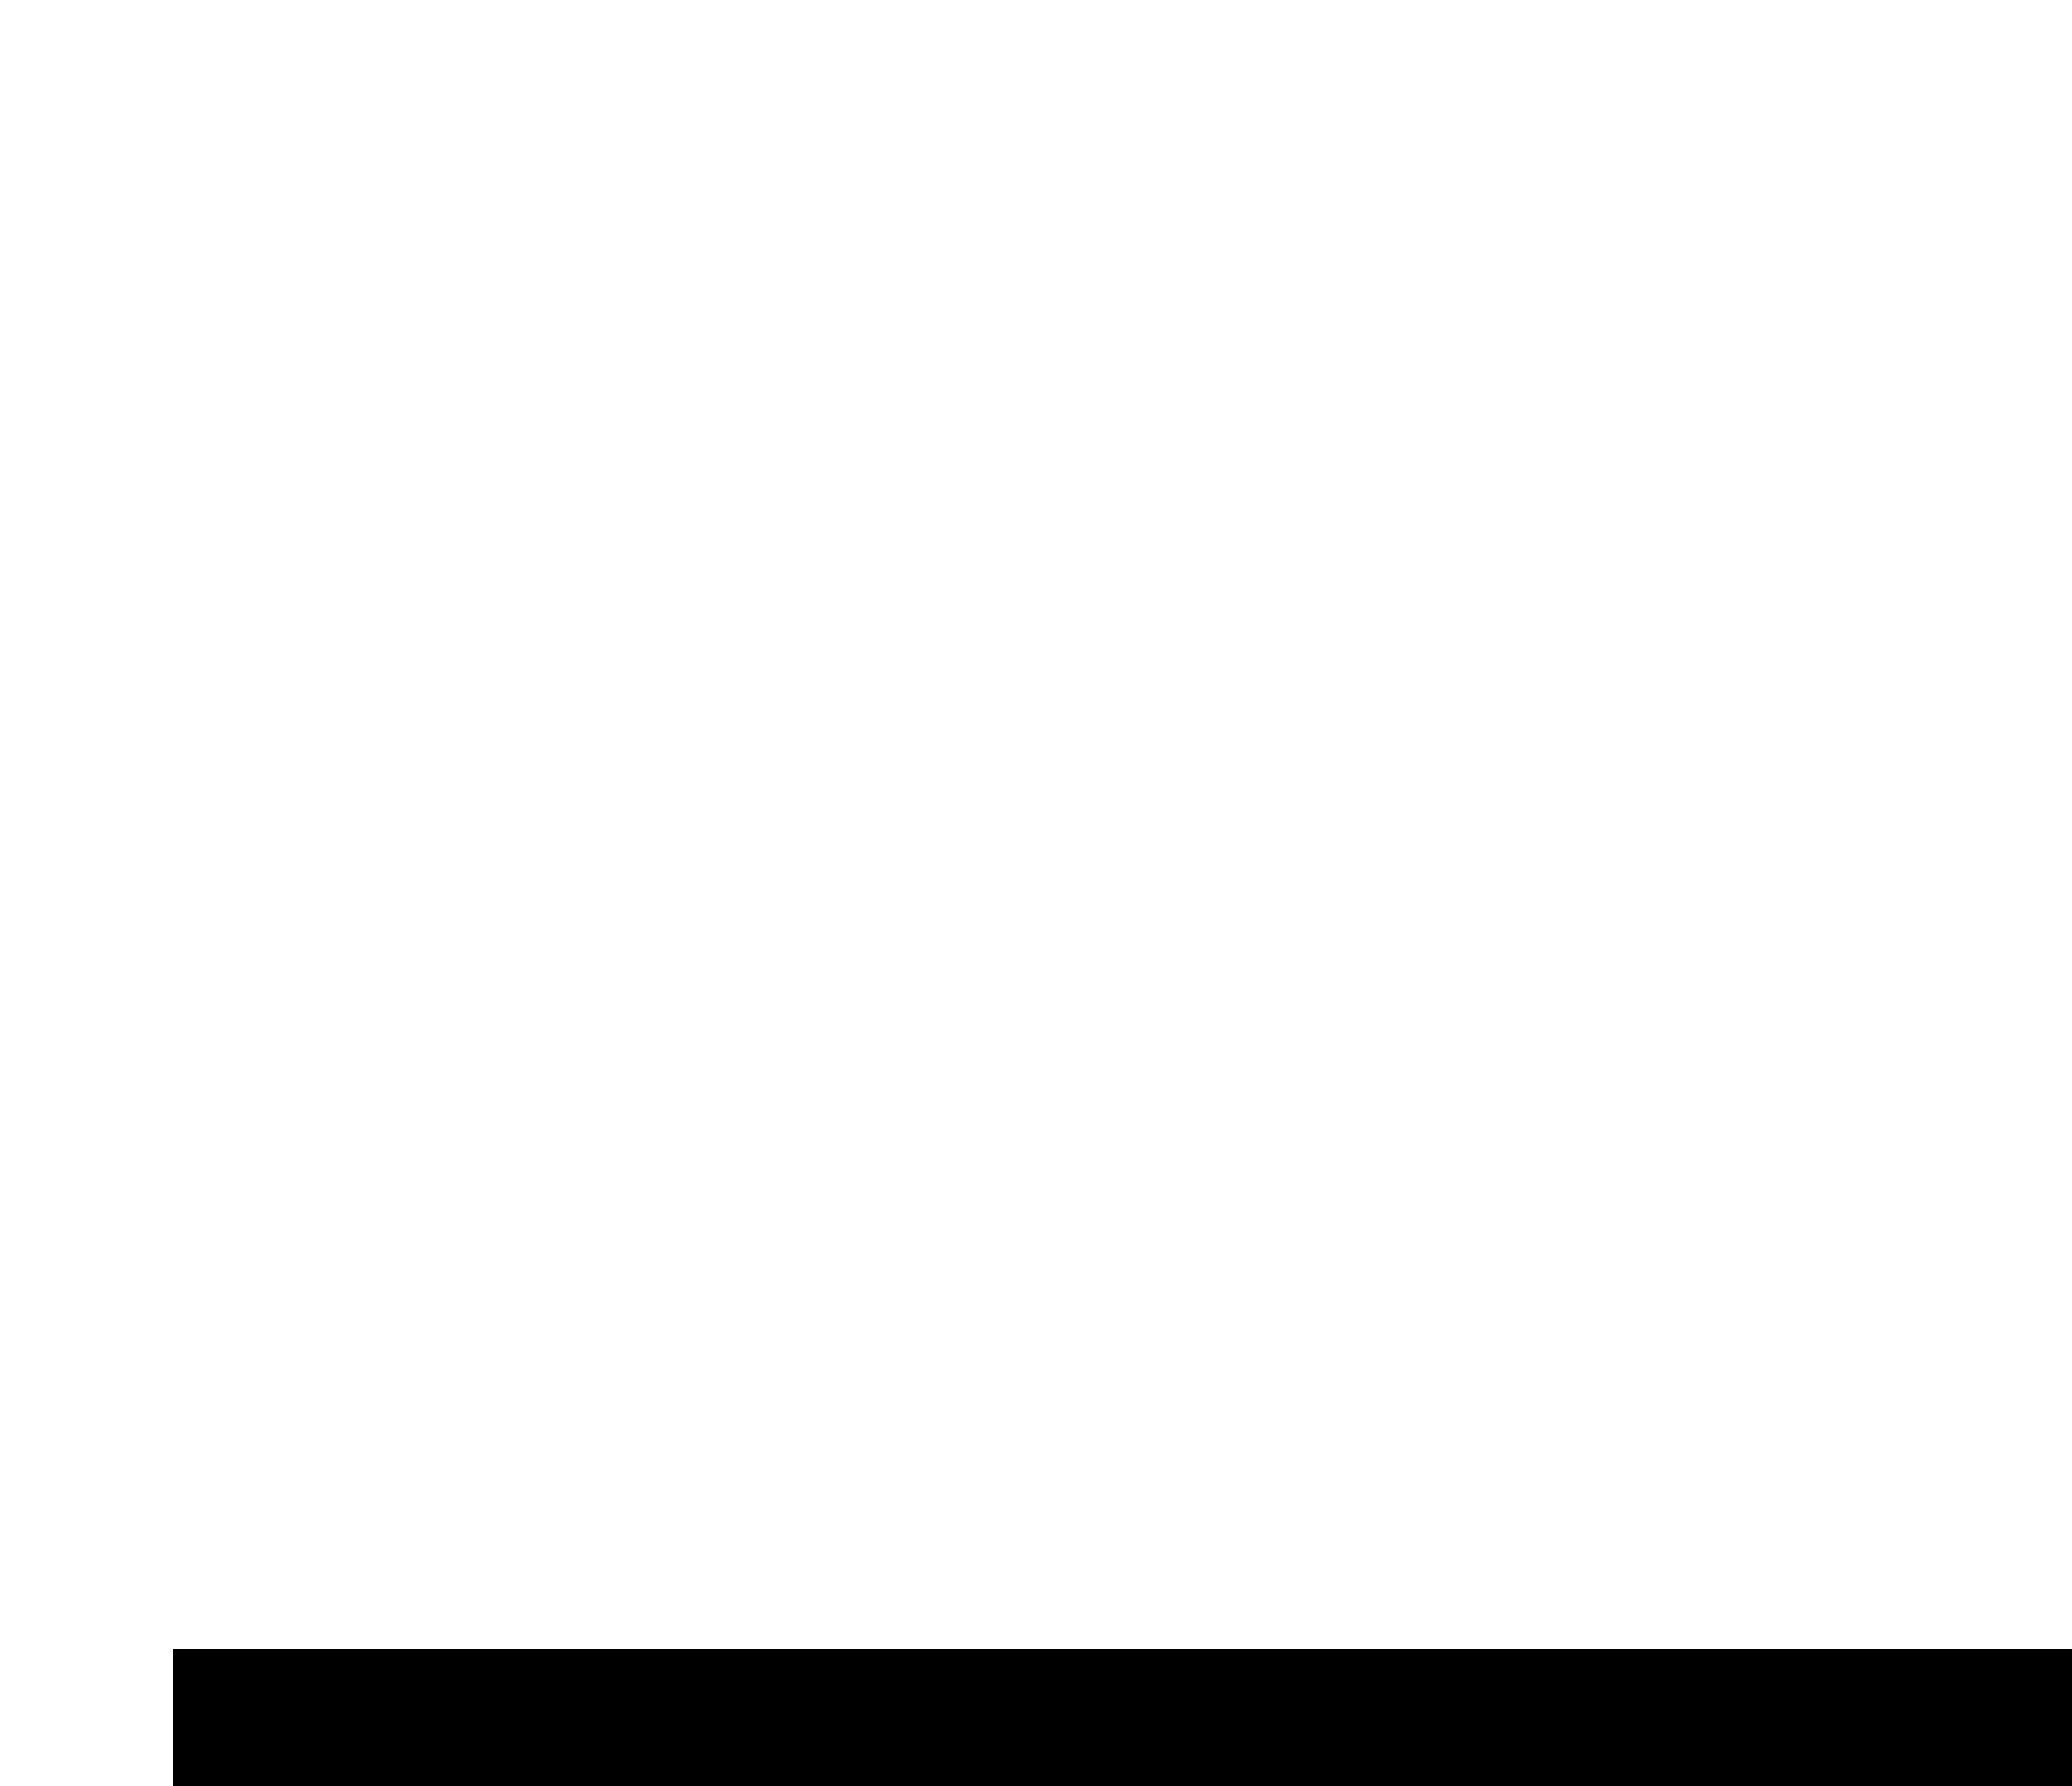
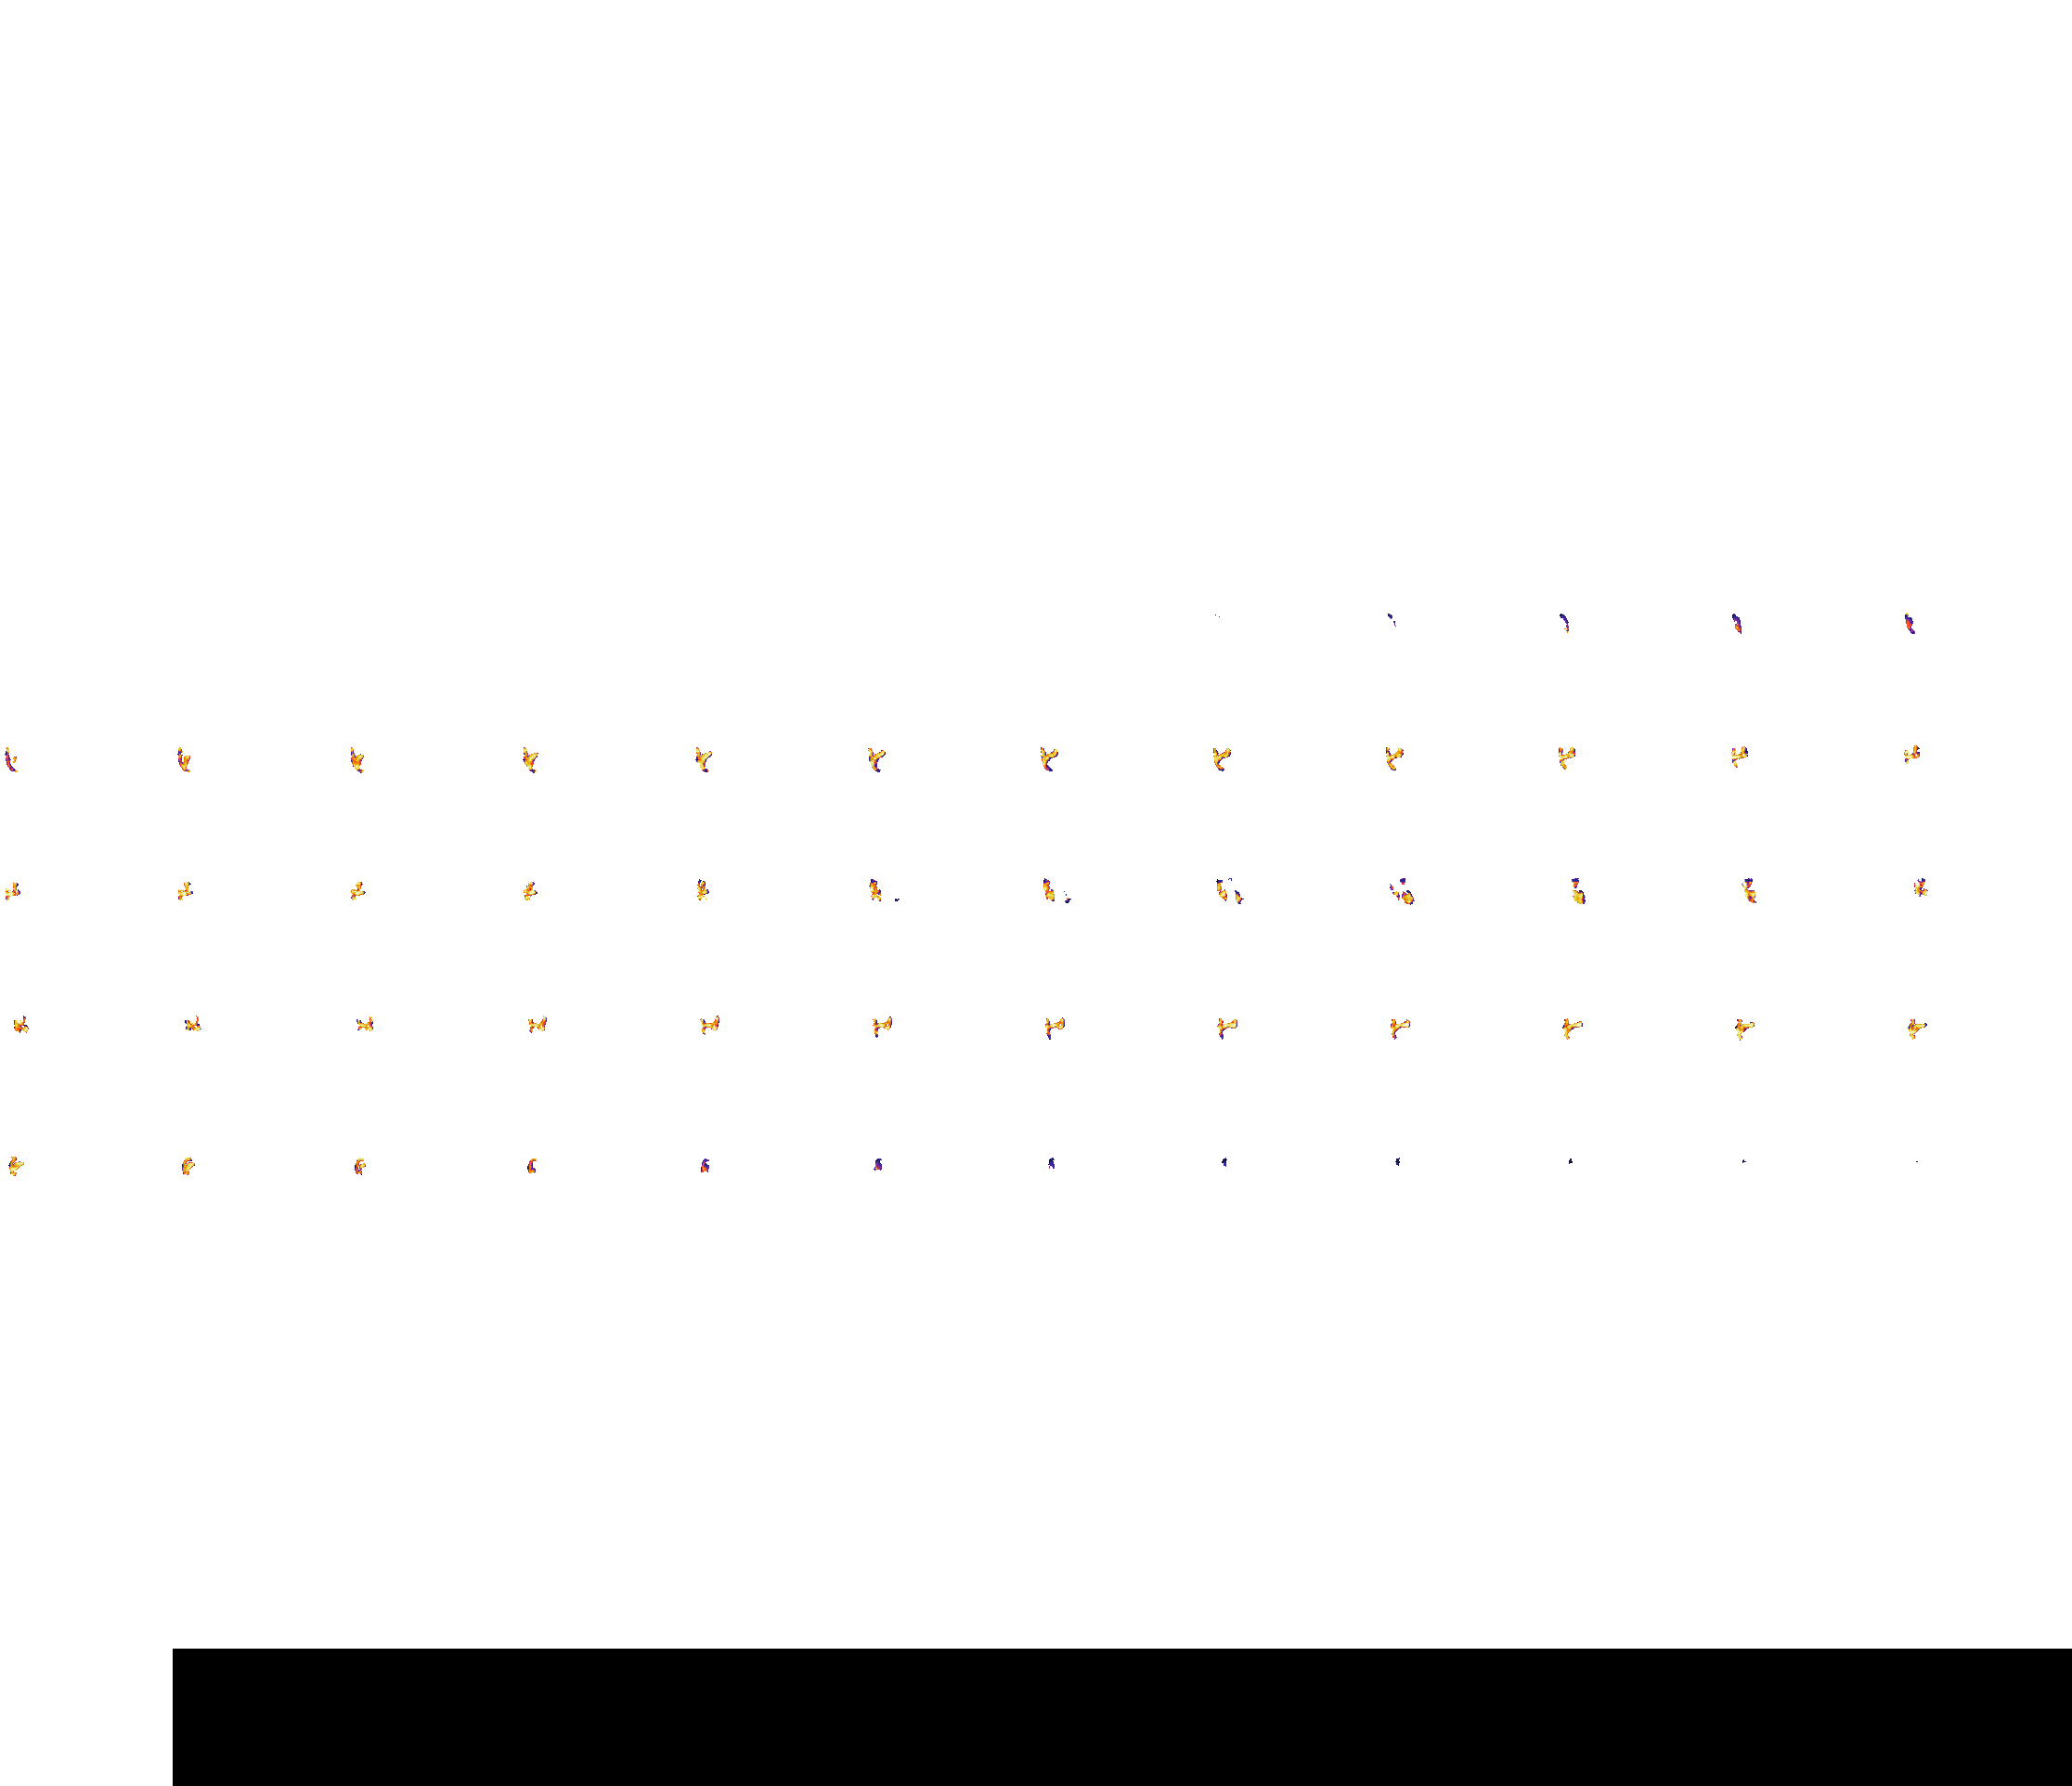

In [25]:
from scipy.special import softmax
anat_sub1_np = anat_maps['subj01'].get_fdata()
print(anat_maps['subj01'].shape)

anat_sub1_coords = numpy2coords(anat_sub1_np, keep_vals = True)

anat_sub1_coords[:,3] = softmax(anat_sub1_coords[:,3])


anat_sub1_sm = coords2numpy(anat_sub1_coords, shape = anat_maps['subj01'].shape, keep_vals = True)


# Convert numpy array back to nibabel image
anat_sub1_sm_nii = nib.Nifti1Image(anat_sub1_sm, anat_maps['subj01'].affine)

# Now you can use this nibabel image with nilearn's plotting function
# plotting.view_img(anat_sub1_sm_nii, bg_img=None, cmap='binary', symmetric_cmap=False)
plotting.view_img(R2_nii, bg_img=None, cmap='CMRmap', symmetric_cmap=False)

# plotting.view_img(anat_sub1_sm, bg_img=None, cmap='binary', symmetric_cmap=False)


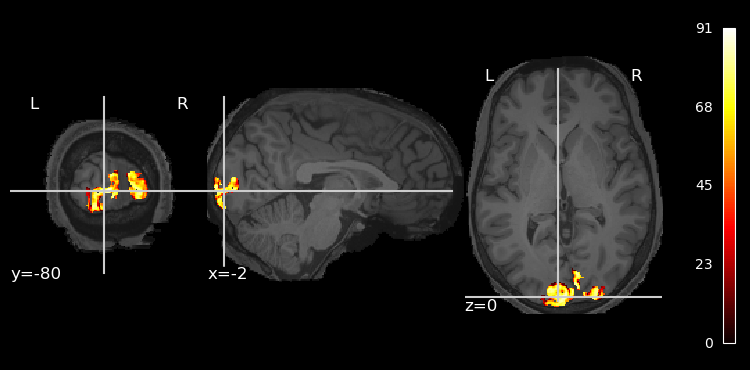

In [26]:

# Assuming func_data is your functional data Nifti image
plotting.plot_stat_map(R2_nii, bg_img=anat_maps['subj01'], display_mode='ortho', colorbar=True)

(481, 30003)


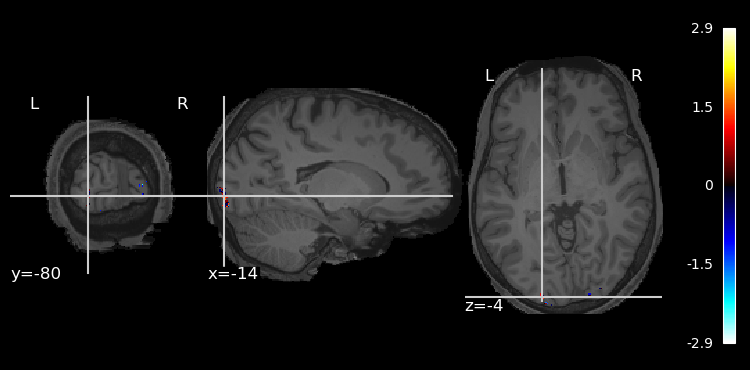

In [92]:
# This function creates a numpy array that I can use to transform into a plottable numpy array in the shape of the subjects brain.
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from nilearn import plotting, image
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap


def visualise_betas(hrf_dict = None, subject = 'subj01', n_trials = 10, which_roi = 'V1', n_voxels = 'all', z_voxel:bool = True):
    if which_roi == 'all':
        rois = hrf_dict[subject].keys()
    else: 
        rois = [f'{which_roi}_mask']
    
    for roi in rois:
        if n_voxels == 'all':
            n_voxels = len(hrf_dict[subject][roi])
            
        voxbetas = np.zeros((n_voxels, n_trials + 3))    
        print(voxbetas.shape)
        # Initialize lists to store voxel coordinates and beta values
        voxel_coords = []
        beta_values = []

        for whichvox, voxel in enumerate(list(hrf_dict[subject][roi].keys())[1 : (n_voxels + 1)]): # 1 because the first one is not a voxel but roi_sizes
            betas = hrf_dict[subject][roi][voxel]['hrf_betas'][:n_trials]
            if z_voxel:
                betas = get_zscore(betas, print_ars = False)
            voxel = hrf_dict[subject][roi][voxel]['xyz']
            
            # Append voxel coordinates and beta values to the lists
            voxel_coords.append(voxel)
            beta_values.append(betas)

            voxbetas[whichvox,:3] = voxel
            voxbetas[whichvox,3:] = betas

        
    def _trialbrain(trial_ar=None, which_trial=0, subject = None):
        anat_sub1 = nib.load(f'/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/{subject}/func1mm/T1_to_func1mm.nii.gz')

        trial_np = coords2numpy(np.concatenate((voxbeta_df[:,:3], voxbeta_df[:,which_trial:which_trial + 1]), axis=1), shape=prf_dict['subj01']['nsd_dat']['angle']['prf_ar'].shape, keep_vals=True)
        
        trial_nii = nib.Nifti1Image(trial_np, anat_sub1.affine)

        # data = trial_np
        # ref_img = nib.Nifti1Image(np.empty_like(data), affine=np.eye(4))
        # zscored_img = image.new_img_like(ref_img, data)

        # # Define the colors
        # cmap = LinearSegmentedColormap.from_list(
        #     "mycmap", [(0, "black"), (0.5, "blue"), (1, "red")]
        # )
        
        # # Create the TwoSlopeNorm instance with vmin and vmax set during creation
        # norm = TwoSlopeNorm(vcenter=0, vmin=-3, vmax=3)

        # Plot the stat map
        # plotting.plot_stat_map(zscored_img, cmap=cmap, norm=norm, colorbar=True)
        plotting.plot_stat_map(trial_nii, bg_img=anat_sub1, display_mode='ortho', colorbar=True)
        plt.show()

            
    _trialbrain(trial_ar = voxbetas, which_trial = 7, subject = subject) # Doesn't work for a lot of trials, annoying. Fix the colour mapping
                    
                    
    return voxbetas
            
voxbeta_df = visualise_betas(hrf_dict = hrf_dict_tight, subject = 'subj01', n_trials = 30000, which_roi = 'V4', n_voxels = 'all', z_voxel = True)

In [40]:
for vox in topvoxels.keys():
    # print (topvoxels[vox]['xyz'])
    
    condition = (voxbeta_df[:,:3] == topvoxels[vox]['xyz'])

    # Use np.all with axis=1 to check if all values in each row of the condition are True
    row_indices = np.where(np.all(condition, axis=1))

    # Print the row indices
    print(row_indices)
    

(array([182]),)
(array([], dtype=int64),)
(array([], dtype=int64),)


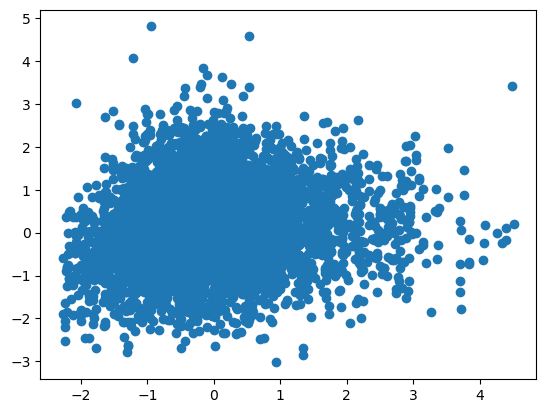

In [57]:
# This is a shitty voxel, apparently, but I hadn't selected it carefully anyway
# plt.plot(voxbeta_df[0,3:1000])




y = voxbeta_df[0,3:5003]
Xrms = (visfeats_rms_crop_prior['subj01']['rms']['rms_z'][:5000])
Xpred_1_MSE = predfeats['content_loss_1_MSE']
Xsc = (visfeats_scce_large['subj01']['sc']['sc_z'][:500])

# Xsc = visfeats_scce['subj01']['scce']['sc'][:500]
# sc_cap = cap_values(Xsc, 0, 4)


plt.scatter(Xrms, y)


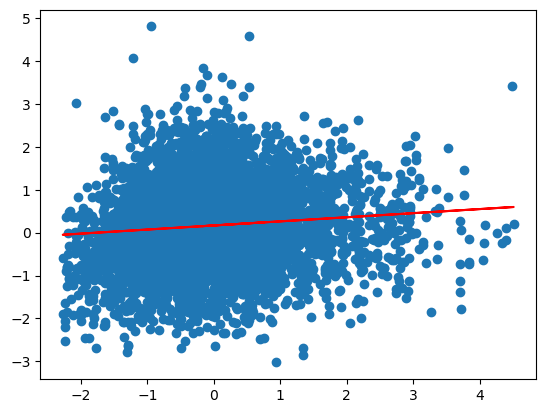

[[0.2151 ]
 [0.19568]
 [0.12352]
 ...
 [0.09323]
 [0.1557 ]
 [0.15069]]


In [49]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Reshape Xrms and y to 2D arrays because sklearn expects 2D inputs
X = np.array(Xrms).reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a PLSRegression object
model = PLSRegression(n_components=1)

# Fit the model to the data
model.fit(X, y)

# Use the model to predict y values
y_hat = model.predict(X)

# Perform 5-fold cross-validation and get predicted y values
kf = KFold(n_splits=5)
y_hat_cv = cross_val_predict(model, X, y, cv=kf)

# Plot the original data
plt.scatter(X, y)

# Plot the fitted line
plt.plot(X, y_hat, color='red')

# Show the plot
plt.show()

print(y_hat_cv)


# Calculate the residuals
residuals = y - y_hat_cv


plt.plot(y[:100])
plt.plot(y_hat_cv[:100])

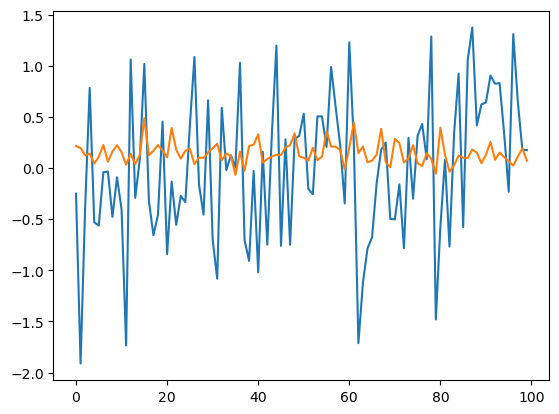

In [52]:

# # Plot the residuals
# plt.scatter(y_hat_cv, residuals)
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs. Predicted values')
# plt.show()

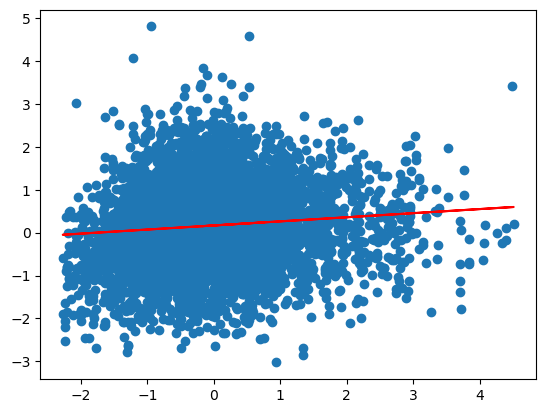

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Reshape Xrms and y to 2D arrays because sklearn expects 2D inputs
X = np.array(Xrms).reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Use the model to predict y values
y_hat = model.predict(X)

# Perform 5-fold cross-validation and get predicted y values
kf = KFold(n_splits=5)
y_hat_cv = cross_val_predict(model, X, y, cv=kf)

# Plot the original data
plt.scatter(X, y)

# Plot the fitted line
plt.plot(X, y_hat, color='red')

# Show the plot
plt.show()

############ This is other stuff downstairs

In [34]:
import numpy as np
import nibabel as nib
import pickle
import os

def get_betas(subjects, voxels, start_session, end_session, prf_region='center'):
    beta_dict = {}
    
    if subjects == 'all':
        subjects = [f'subj{i:02d}' for i in range(1, 9)]
    else:
        subjects = [subjects]
    
    for subject in subjects:
        beta_dict[subject] = {}
        rois = list(voxels[subject].keys())
        hrf_betas = {}
        
        for session in range(start_session, end_session + 1):
            session_str = f'{session:02d}'
            session_nifti = nib.load(f'/home/rfpred/data/natural-scenes-dataset/nsddata_betas/ppdata/{subject}/func1mm/betas_fithrf_GLMdenoise_RR/betas_session{session_str}.nii.gz').get_fdata(caching='unchanged')
            n_imgs = session_nifti.shape[3]
        
            print(f'Working on session: {session} of subject: {subject}')
            for roi in rois:
                if session == start_session:
                    hrf_betas[roi] = {}
                
                voxel_mask = voxels[subject][roi]
                n_voxels = np.sum(voxel_mask).astype('int')
                vox_indices = np.zeros([n_voxels, voxel_mask.ndim], dtype=int)
                
                for coordinate in range(vox_indices.shape[1]):
                    vox_indices[:, coordinate] = np.where(voxel_mask == 1)[coordinate]
                
                for voxel in range(n_voxels):
                    vox_idx = tuple(vox_indices[voxel])
                    hrf_betas_ses = (np.array(session_nifti[vox_idx]).reshape(n_imgs, 1)) / 300
                    
                    if session == start_session:
                        hrf_betas[roi][f'voxel{voxel + 1}'] = {
                            'vox_idx': vox_idx,
                            'beta_values': hrf_betas_ses
                        }
                    else:
                        hrf_betas[roi][f'voxel{voxel + 1}']['beta_values'] = np.append(hrf_betas[roi][f'voxel{voxel + 1}']['beta_values'], hrf_betas_ses)
                    
            with open(f'./data/custom_files/{subject}/intermediate_hrf_save.pkl', 'wb') as fp:
                pickle.dump(hrf_betas, fp)
                print('     - Back-up saved to intermediate_hrf_save.pkl\n')
                    
        beta_dict[subject] = hrf_betas               
        
    with open(f'./data/custom_files/{subject}/beta_dict{start_session}_{end_session}_{prf_region}.pkl', 'wb') as fp:
        pickle.dump(beta_dict, fp)
        print(f'     - Back-up saved to beta_dict{start_session}_{end_session}_{prf_region}.pkl\n')        
        
    return beta_dict


In [35]:
test_betas_sub1 = get_betas('subj01', prf_mask_center_strict, 1, 2, prf_region = 'center_strict')


KeyboardInterrupt: 

In [43]:

files = os.listdir(f'/home/rfpred/data/custom_files/subj01/center_strict/')

# Filter files that start with "beta_dict" and end with ".pkl"
filtered_files = [file for file in files if file.startswith("beta_dict") and file.endswith(".pkl")]

# Sort files based on the first number after 'beta_dict'
sorted_files = sorted(filtered_files, key=lambda x: int(''.join(filter(str.isdigit, x.split('beta_dict')[1]))))

# Print the sorted file names
for n_file, file_name in enumerate(sorted_files):
    print(file_name)
        
    with open(f'/home/rfpred/data/custom_files/subj01/center_strict/{file_name}', 'rb') as fp:
        beta_session = pickle.load(fp)
    
print_dict_structure(beta_session['subj01']['V1_mask']['voxel1'])

beta_dict0_2.pkl
beta_dict3_5.pkl
beta_dict6_10.pkl
beta_dict11_15.pkl
beta_dict16_20.pkl
beta_dict21_27.pkl
beta_dict28_35.pkl
beta_dict36_39.pkl


AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [13]:

aaa = hrf_dict_tight['subj01']['V1_mask'][f'voxel1']['xyz'] == topvoxels['voxel1']['xyz']

topvoxels

{'voxel0': {'xyz': [54, 21, 61],
  'roi': 'V2',
  'angle': 75.5415267944336,
  'eccentricity': 0.6557552814483643,
  'exponent': 0.09722618758678436,
  'gain': 0.7777680158615112,
  'meanvol': 601.6583251953125,
  'R2': 64.72003173828125,
  'size': 0.34625130891799927,
  'nsdR2': 29.433338165283203},
 'voxel1': {'xyz': [100, 24, 82],
  'roi': 'V2',
  'angle': 233.2727508544922,
  'eccentricity': 0.6770132184028625,
  'exponent': 0.04048101231455803,
  'gain': 0.6980307698249817,
  'meanvol': 581.2053833007812,
  'R2': 55.13924789428711,
  'size': 0.30321988463401794,
  'nsdR2': 29.2231388092041},
 'voxel2': {'xyz': [100, 24, 83],
  'roi': 'V2',
  'angle': 245.0668487548828,
  'eccentricity': 0.6201316714286804,
  'exponent': 0.007486667949706316,
  'gain': 0.7928726077079773,
  'meanvol': 562.7115478515625,
  'R2': 58.03012466430664,
  'size': 0.32681310176849365,
  'nsdR2': 25.82582664489746},
 'voxel3': {'xyz': [101, 25, 82],
  'roi': 'V2',
  'angle': 226.0159454345703,
  'eccentrici

In [15]:
list(topvoxels['voxel1']['xyz'])
for i in range(1,5):
    a = (hrf_dict_tight['subj01']['V1_mask'][f'voxel{i}']['xyz'])
    print(a)
    
    
# list(hrf_dict_tight['subj01']['V1_mask'].keys())
len(hrf_dict_tight['subj01']['V4_mask'].keys())

print(len(hrf_dict_tight['subj01']['V1_mask']['voxel425']))
print(hrf_dict_tight['subj01']['V1_mask']['voxel425'])

[56, 9, 74]
[56, 9, 77]
[56, 10, 75]
[56, 13, 69]
2250
[-0.57    -0.78333  0.22333 ...  3.17333  2.19    -1.02333]


In [174]:
y = get_zscore(hrf_dict_tight['subj01']['V1_mask']['voxel1']['hrf_betas'])
this_vox = 1
n_voxels = len(list(hrf_dict_tight['subj01']['V1_mask'].keys()))
print(n_voxels)

for i in range(1, n_voxels-500):
# for i in range(1,5):
    
    xyz_beta = (hrf_dict_tight['subj01']['V1_mask'][f'voxel{i}']['xyz'])
    print(xyz_beta)
    # this_vox = f'voxel{vox}'
    # vox_info = hrf_dict_tight['subj01']['V1_mask'][this_vox]
    
    # topvoxels['voxel1']['xyz']

    


Original array: [-0.00333 -0.96    -1.20333 ... -0.82667  0.66667 -0.51333]
Z-scores: [ 0.02184 -0.83567 -1.05378 ... -0.71616  0.62239 -0.4353 ]
610
[56, 9, 74]
[56, 9, 77]
[56, 10, 75]
[56, 13, 69]
[56, 14, 69]
[56, 14, 70]
[57, 9, 74]
[57, 10, 72]
[57, 11, 76]
[57, 12, 62]
[57, 12, 69]
[57, 13, 64]
[57, 13, 65]
[57, 13, 66]
[57, 13, 68]
[57, 13, 69]
[57, 13, 70]
[57, 14, 65]
[57, 14, 67]
[57, 14, 68]
[57, 14, 69]
[57, 15, 63]
[57, 15, 64]
[57, 15, 69]
[58, 7, 75]
[58, 9, 72]
[58, 9, 73]
[58, 9, 75]
[58, 10, 71]
[58, 10, 72]
[58, 10, 74]
[58, 11, 62]
[58, 11, 68]
[58, 11, 69]
[58, 11, 70]
[58, 11, 71]
[58, 11, 72]
[58, 11, 73]
[58, 11, 74]
[58, 12, 62]
[58, 12, 65]
[58, 12, 66]
[58, 12, 67]
[58, 12, 68]
[58, 12, 69]
[58, 12, 70]
[58, 12, 71]
[58, 12, 72]
[58, 12, 73]
[58, 12, 74]
[58, 13, 61]
[58, 13, 62]
[58, 13, 63]
[58, 13, 64]
[58, 13, 65]
[58, 13, 66]
[58, 13, 67]
[58, 13, 68]
[58, 13, 69]
[58, 13, 70]
[58, 13, 71]
[58, 13, 74]
[58, 14, 61]
[58, 14, 62]
[58, 14, 63]
[58, 14, 64]

In [59]:
y = get_zscore(hrf_dict_tight['subj01']['V1_mask']['voxel1']['hrf_betas'])
this_vox = 1
voxel_keys = list(hrf_dict_tight['subj01']['V1_mask'].keys())
for vox in range(len(voxel_keys)):
    print(this_vox)
    match = np.array_equal(hrf_dict_tight['subj01']['V1_mask'][f'voxel{this_vox}']['xyz'], np.array(topvoxels['voxel1']['xyz']))
    while not match:
        this_vox += 1
        if this_vox > len(voxel_keys):
            break
        match = np.array_equal(hrf_dict_tight['subj01']['V1_mask'][f'voxel{this_vox}']['xyz'], np.array(topvoxels['voxel1']['xyz']))
    if match or this_vox > len(voxel_keys):
        break
print(this_vox)

Original array: [-0.00333 -0.96    -1.20333 ... -0.82667  0.66667 -0.51333]
Z-scores: [ 0.02184 -0.83567 -1.05378 ... -0.71616  0.62239 -0.4353 ]
1


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# prf_mask_center_strict['subj01']['V1_mask'].shape
prf_mask_center_strict_prf_rsq[0]['subj01']['V1_mask'].shape

In [ ]:
prfgain = prf_dict['subj01']['nsd_dat']['eccentricity']['prf_dat']
prfsok = prf_dict['subj01']['nsd_dat']['R2']['prf_dat']


print(prfgain.shape)

v1betas = hrf_dict_tight['subj01']['V1_mask']['roi_sizes'][:,:-1].astype('int')
# print(v1betas)
v1np = coords2numpy(v1betas, prfgain.shape)
    
    
v1nii = nib.Nifti1Image(v1np.astype(np.int16), affine=np.eye(4))

plotting.plot_stat_map(v1nii, display_mode = 'ortho')


In [ ]:
from nilearn import plotting
brain = vismask_dict['subj01']['V1_mask']

ni_img = nib.Nifti1Image(brain.astype(np.int16), affine=np.eye(4))
plotting.view_img(prfsok, display_mode = 'ortho')


# plotting.plot_roi(prfgain, display_mode='ortho', cut_coords=(12, 68, 60), title='V1 Mask')



In [49]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image


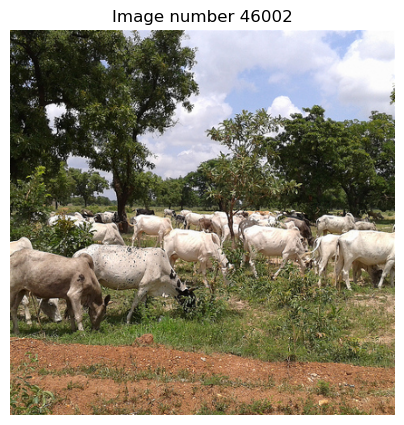

NameError: name 'transform' is not defined

In [47]:
imgnp = show_stim(img_no = 46002, small = 'y')[0]
imgPIL = Image.fromarray(imgnp) # Convert into PIL from np
imgt = transform(imgPIL) # Transform into the right format for alexnet
img = imgt.unsqueeze(0) # add a batch dimension

#################################

In [ ]:
import torch.nn as nn

class AlexNetConv4(nn.Module):
    def __init__(self):
        super(AlexNetConv4, self).__init__()
        self.features = nn.Sequential(
            # stop at conv4
            *list(models.alexnet(pretrained=True).features.children())[:10]
        )
    def forward(self, x):
        x = self.features(x)
        return x

model = AlexNetConv4()
model.eval()

In [ ]:
# Perform the forward pass
with torch.no_grad():
    img_out = model(img)

#########################################################

In [42]:
import torch
import torchvision.models as models

# Load the pretrained AlexNet model
model = models.alexnet(pretrained=True)
model.eval()  # Set the model to evaluation mode


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [43]:
from torch.nn import Module

class AlexNetFeatureExtractor(Module):
    def __init__(self, model):
        super(AlexNetFeatureExtractor, self).__init__()
        # Assuming you want to capture outputs after each max pooling layer
        self.features = model.features
        self.layer1 = torch.nn.Sequential(*list(self.features.children())[:3])  # Up to first max pooling
        self.layer2 = torch.nn.Sequential(*list(self.features.children())[3:6])  # Up to second max pooling
        self.layer3 = torch.nn.Sequential(*list(self.features.children())[6:8])  # Up to third max pooling
        self.layer4 = torch.nn.Sequential(*list(self.features.children())[8:10])  # Up to fourth max pooling
        self.layer5 = torch.nn.Sequential(*list(self.features.children())[10:13])  # Up to fifth max pooling

    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)
        x5 = self.layer5(x4)
        return x1, x2, x3, x4, x5


In [44]:
from torch.nn import Module

class AlexNetFeatureExtractor(Module):
    def __init__(self, model):
        super(AlexNetFeatureExtractor, self).__init__()
        # Assuming you want to capture outputs after each max pooling layer
        self.features = model.features
        self.layer1 = torch.nn.Sequential(*list(self.features.children())[:3])  # Up to first max pooling
        self.layer2 = torch.nn.Sequential(*list(self.features.children())[3:6])  # Up to second max pooling
        self.layer3 = torch.nn.Sequential(*list(self.features.children())[6:8])  # Up to third max pooling
        self.layer4 = torch.nn.Sequential(*list(self.features.children())[8:10])  # Up to fourth max pooling
        self.layer5 = torch.nn.Sequential(*list(self.features.children())[10:13])  # Up to fifth max pooling

    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)
        x5 = self.layer5(x4)
        return x1, x2, x3, x4, x5

feature_extractor = AlexNetFeatureExtractor(model)

#### This one works for the full 425x425 images

In [50]:
from torchvision import transforms
from PIL import Image

# Load and preprocess the image
# img = Image.open('path_to_your_image.jpg')
img = imgPIL
preprocess = transforms.Compose([
    transforms.Resize(256),  # Resize so the smallest side is 256
    transforms.CenterCrop(227),  # Crop a 227x227 patch from the center
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


#### This is for the 100x100 crops

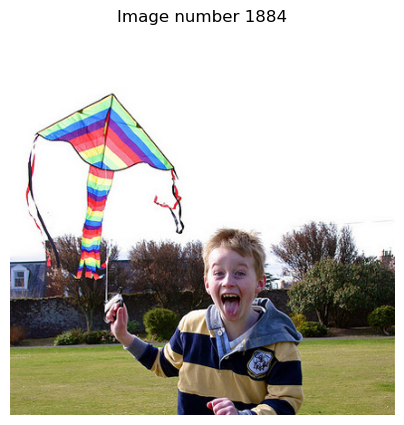

In [51]:
from torchvision import transforms
from PIL import Image

imgnp = show_stim(img_no = 1884, small = 'y')[0][163:263,163:263]
imgPIL = Image.fromarray(imgnp) # Convert into PIL from np
# imgt = transform(imgPIL) # Transform into the right format for alexnet
# img = imgt.unsqueeze(0) # add a batch dimension
# img = imgPIL
preprocess = transforms.Compose([
    transforms.Resize(227),  # Resize the image to 227x227 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(imgPIL).unsqueeze(0)  # Add batch dimension


(-0.5, 99.5, 99.5, -0.5)

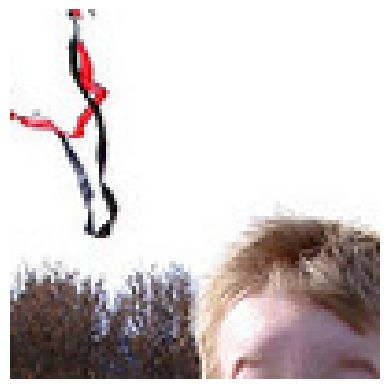

In [52]:
plt.imshow(imgnp)
plt.axis('off')

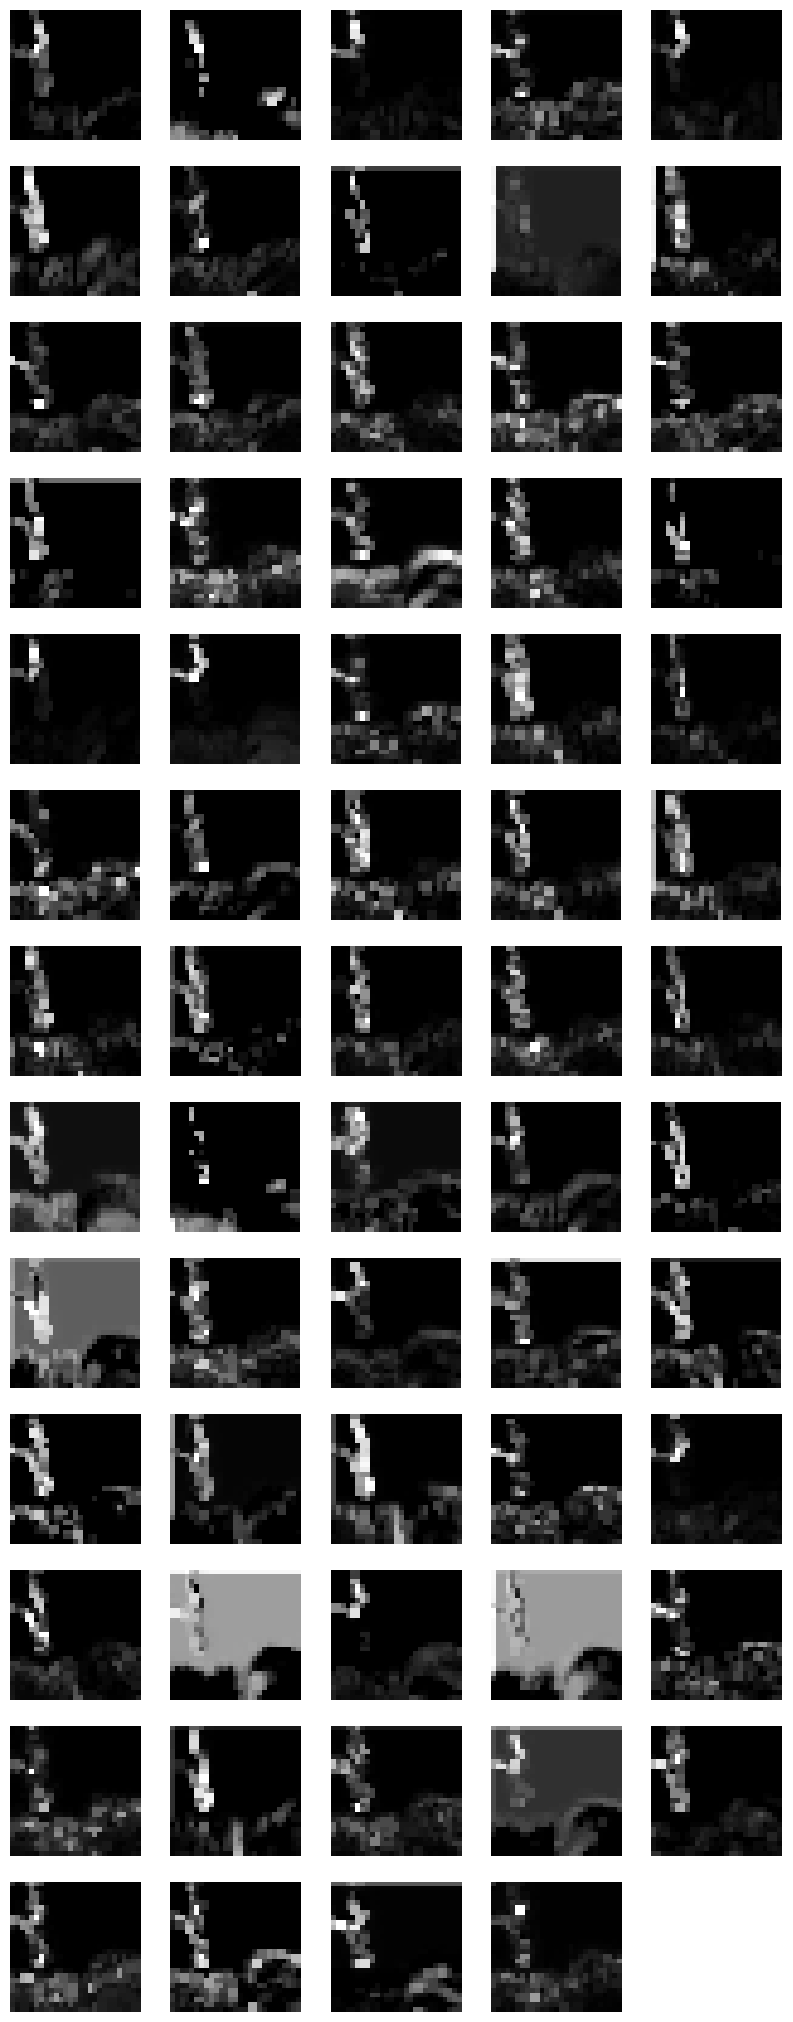

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features(features, num_cols=5):
    # Choose a single layer output to visualize
    layer_features = features[0]  # For example, visualize the first layer outputs
    num_features = layer_features.shape[1]  # Number of channels in the selected layer

    num_rows = (num_features + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    
    for i in range(num_rows * num_cols):
        ax = axes[i // num_cols, i % num_cols]
        if i < num_features:
            # Normalize feature map for better visualization
            feature_map = layer_features[0, i].detach().numpy()
            feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
            ax.imshow(feature_map, cmap='grey')
        ax.axis('off')

    plt.show()

# Assuming you have initialized and passed the image through the feature_extractor
features = feature_extractor(img_tensor)
plot_features(features)


#########################################

In [54]:
import torch
import torchvision.models as models

# Load the pretrained AlexNet model
alexnet = models.alexnet(pretrained=True)
alexnet.eval()


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

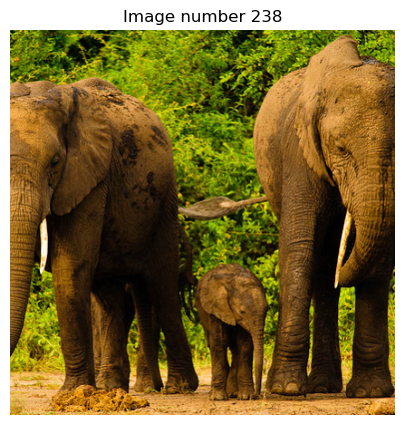

In [55]:
from torchvision import transforms
from PIL import Image

# Define the image transformation
preprocess = transforms.Compose([
    transforms.Resize(227),
    transforms.CenterCrop(227),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load your image
img = Image.fromarray(show_stim(small = 'y')[0])
img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


In [56]:
from torch import nn

class AlexNetFeatureExtractor(nn.Module):
    def __init__(self, model):
        super(AlexNetFeatureExtractor, self).__init__()
        self.features = model.features
        self.avgpool = model.avgpool

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return x

# Initialize the feature extractor
feature_extractor = AlexNetFeatureExtractor(alexnet)

# Extract features
features = feature_extractor(img_tensor)


In [57]:
from funcs.imgproc import rand_img_list

n_imgs = 10
imgs, _,_ = rand_img_list(n_imgs, asPIL = False, add_masks = False, select_ices = get_imgs_designmx()['subj01'][:n_imgs])



def get_alexnet_features(imgs):
    
    # Load your image
    # img = Image.fromarray(show_stim(small = 'y')[0])
    for n, img in enumerate(imgs):
        print(n)
        img = Image.fromarray(img[163:263,163:263])
        img_tensor = preprocess(img).unsqueeze(0) # Add batch dimension
        features = feature_extractor(img_tensor)
        print(features)
        if n == 0:
            all_feats = np.zeros((features.shape[1], len(imgs)))
        all_feats[:,n] = features.detach().numpy()
    return all_feats


In [58]:
ft = get_alexnet_features(imgs)

0
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
1
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1321]],
       grad_fn=<ViewBackward0>)
2
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
3
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0315, 1.2402, 1.2402]],
       grad_fn=<ViewBackward0>)
4
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
5
tensor([[ 0.0000,  0.0000,  0.0000,  ..., 11.4544, 14.8936, 14.8936]],
       grad_fn=<ViewBackward0>)
6
tensor([[0.0000, 0.4740, 0.4740,  ..., 0.0000, 0.0102, 0.1412]],
       grad_fn=<ViewBackward0>)
7
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
8
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
9
tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0147, 2.1220, 2.1220]],
       grad_fn=<ViewBackward0>)


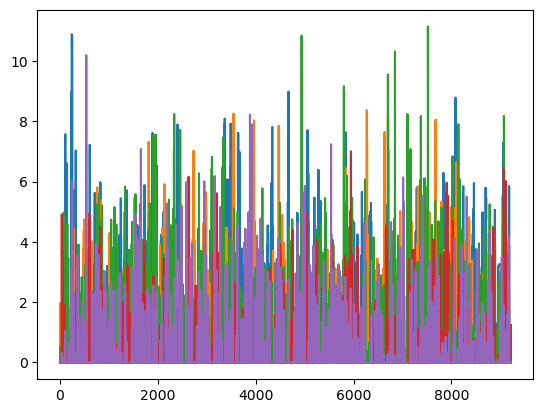

In [59]:
plt.plot(ft[:,0])
plt.plot(ft[:,1])
plt.plot(ft[:,2])
plt.plot(ft[:,3])
plt.plot(ft[:,4])

In [60]:
hrf_dict_tight['subj01']['V1_mask']['voxel0']

NameError: name 'hrf_dict_tight' is not defined

In [69]:
def get_beta_selection(subject = 'subj01', roi = 'V1_mask', n_voxels = 10, n_imgs = 100, hrf_dict = None):
    vox_ids = list(hrf_dict[subject][roi].keys())
    y = np.zeros((n_imgs, n_voxels))
    for vox in range(n_voxels):
        vox_id = vox_ids[vox + 1]
        
        y[:,vox] = hrf_dict[subject][roi][vox_id]['hrf_betas'][:n_imgs]
        
        
    return y
# hrf_dict_tight['subj01']['V1_mask']['voxel1']['hrf_betas'].shape

bets = get_beta_selection(subject = 'subj01', roi = 'V1_mask', n_voxels = 5, n_imgs = 1000, hrf_dict = hrf_dict_tight)

In [70]:
bets.shape

(1000, 5)

In [71]:
if ft.shape[0] != n_imgs:
    ft = ft.T
ft.shape


(1000, 9216)

In [72]:
from sklearn.cross_decomposition import PLSRegression

# Assuming 'features' is a matrix of features from your images
# and 'betas' is a matrix of HRF betas from your fMRI dataset
pls = PLSRegression(n_components=40)
pls.fit(ft, bets)
# pls.fit(features.numpy(), betas)


# You can now use pls to predict, analyze coefficients, etc.


PLSRegression(n_components=40)

In [75]:
coefficients = pls.coef_
coefficients.shape

(5, 9216)

In [76]:
def calculate_vip(model):
    t = model.x_scores_  # Scores
    w = model.x_weights_  # Weights
    q = model.y_loadings_  # Loadings

    p, h = w.shape
    vips = np.zeros((p,))
    
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    
    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j]))**2 for j in range(h)])
        vips[i] = np.sqrt(p * (s.T @ weight) / total_s)
    
    return vips

vip_scores = calculate_vip(pls)
print(vip_scores)

/tmp/ipykernel_3637505/2121012377.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p * (s.T @ weight) / total_s)


[0.81192 0.81586 0.78775 ... 0.92428 0.80428 0.78803]


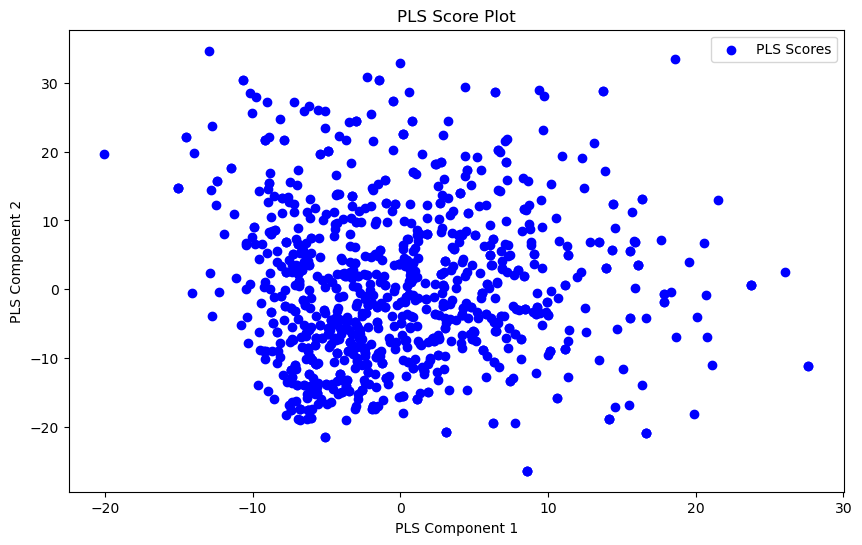

In [77]:
import matplotlib.pyplot as plt

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.scatter(pls.x_scores_[:, 0], pls.x_scores_[:, 1], c='blue', label='PLS Scores')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS Score Plot')
plt.legend()
plt.show()


In [78]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Cross-validation predictions
y_cv = cross_val_predict(pls, ft, bets, cv=5)

# Calculate metrics
mse = mean_squared_error(bets, y_cv)
r2 = r2_score(bets, y_cv)

print(f'MSE: {mse}')
print(f'R^2: {r2}')


MSE: 0.818773133779892
R^2: -0.5397010184189468


In [80]:
n_imgs = 1000
# start = n_imgs + random.randint(0,72999-n_imgs)
start = 1500
new_imgs, _,_ = rand_img_list(n_imgs, asPIL = False, add_masks = False, select_ices = get_imgs_designmx()['subj01'][start:n_imgs+start])
# new_imgs = [Image.fromarray(sokje[163:263,163:263]) for sokje in new_imgs]
new_features = get_alexnet_features(new_imgs).T

0
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
1
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4188, 1.4528]],
       grad_fn=<ViewBackward0>)
2
tensor([[0.0000, 0.0000, 0.0000,  ..., 2.1383, 0.7629, 0.0000]],
       grad_fn=<ViewBackward0>)
3
tensor([[11.1359, 11.1359,  5.2122,  ...,  0.4947,  0.0000,  0.0000]],
       grad_fn=<ViewBackward0>)
4
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
5
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
6
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3676, 0.0000, 0.0000]],
       grad_fn=<ViewBackward0>)
7
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)
8
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.3932]],
       grad_fn=<ViewBackward0>)
9
tensor([[0.0000, 0.0000, 0.5043,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ViewBackward0>)
10
tensor([[2.3727, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ViewBackward0>)
11
tensor([[0., 0., 0.,  ...

In [81]:
if new_features.shape[0] != n_imgs:
    new_features = new_features.T
new_features.shape
# Predicting new data (assuming 'new_features' is your new dataset)
new_betas_predicted = pls.predict(new_features)


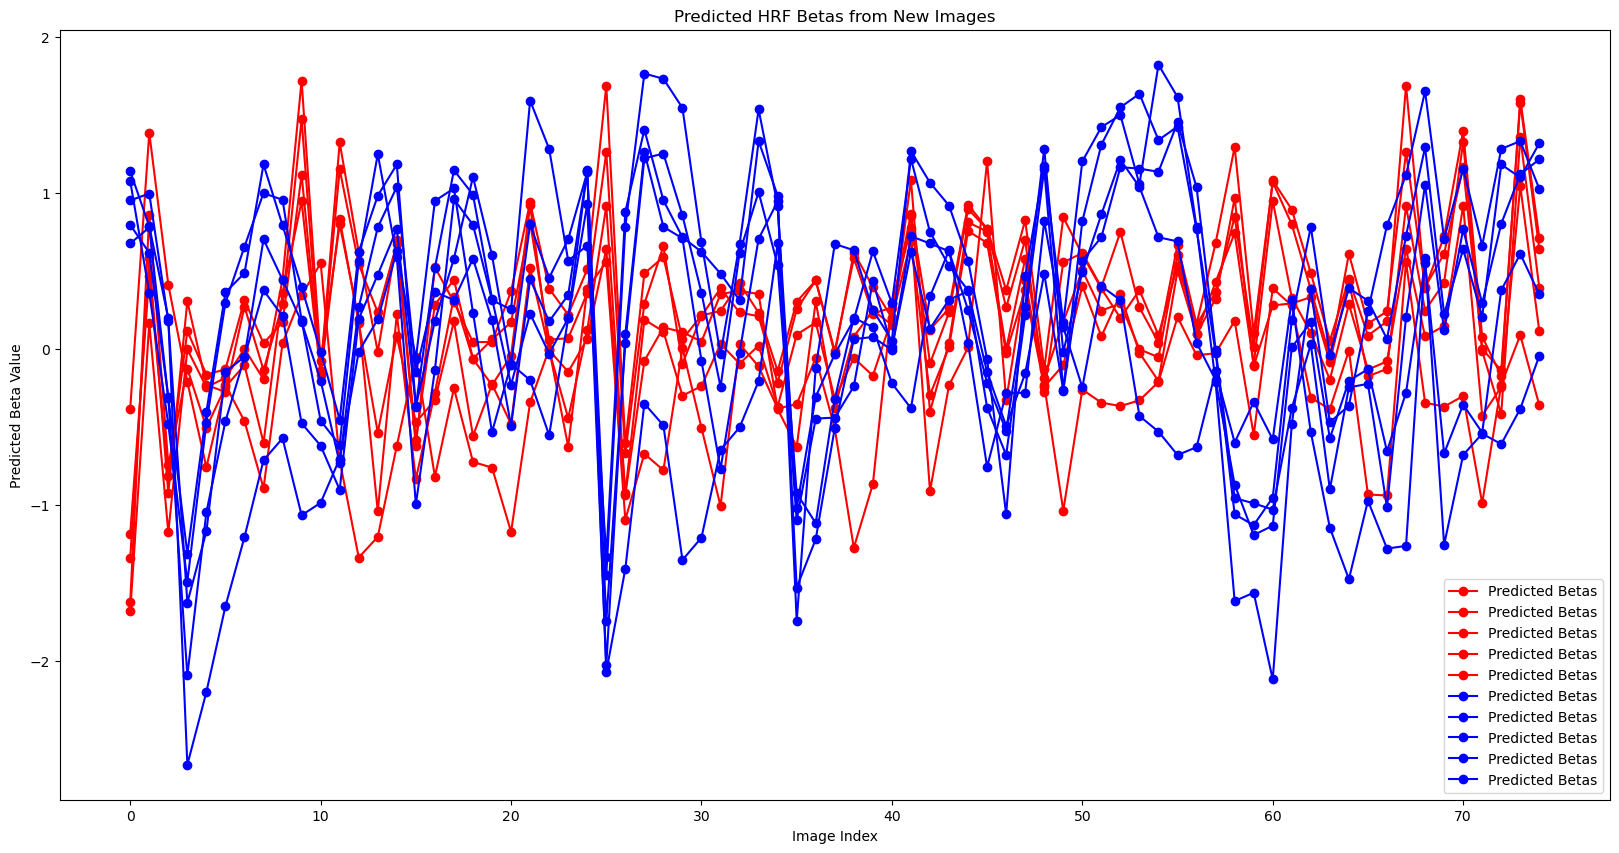

In [83]:
import matplotlib.pyplot as plt

# Example: Plotting the predicted beta values
plt.figure(figsize=(20, 10))
plt.plot(new_betas_predicted[100:175], 'ro-', label='Predicted Betas')
plt.plot(bets[100:175], 'bo-', label='Predicted Betas')
plt.title('Predicted HRF Betas from New Images')
plt.xlabel('Image Index')
plt.ylabel('Predicted Beta Value')
plt.legend()
plt.show()


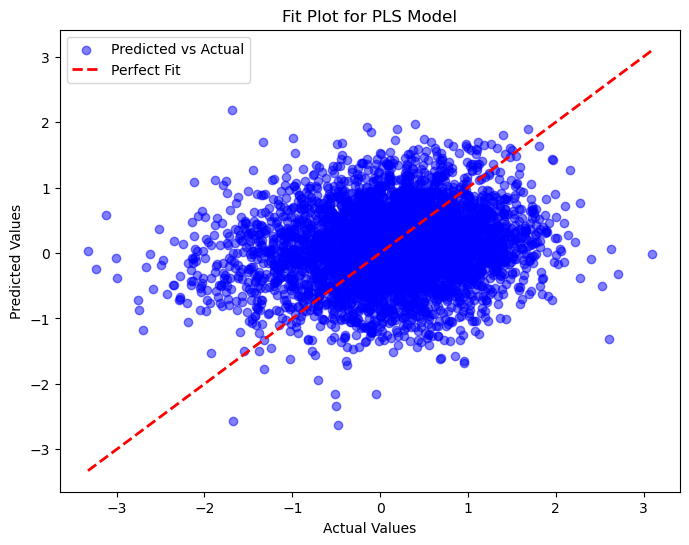

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'actual_values' and 'predicted_values' are your datasets
actual_values = bets  # This should be your actual data
# predicted_values = pls.predict(features.numpy())  # Predict using your PLS model
predicted_values = pls.predict(new_features)
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.title('Fit Plot for PLS Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot a line of perfect fit
line = np.linspace(min(actual_values.min(), predicted_values.min()), max(actual_values.max(), predicted_values.max()), 100)
plt.plot(line, line, color='red', linewidth=2, linestyle='--', label='Perfect Fit')

plt.legend()
plt.show()


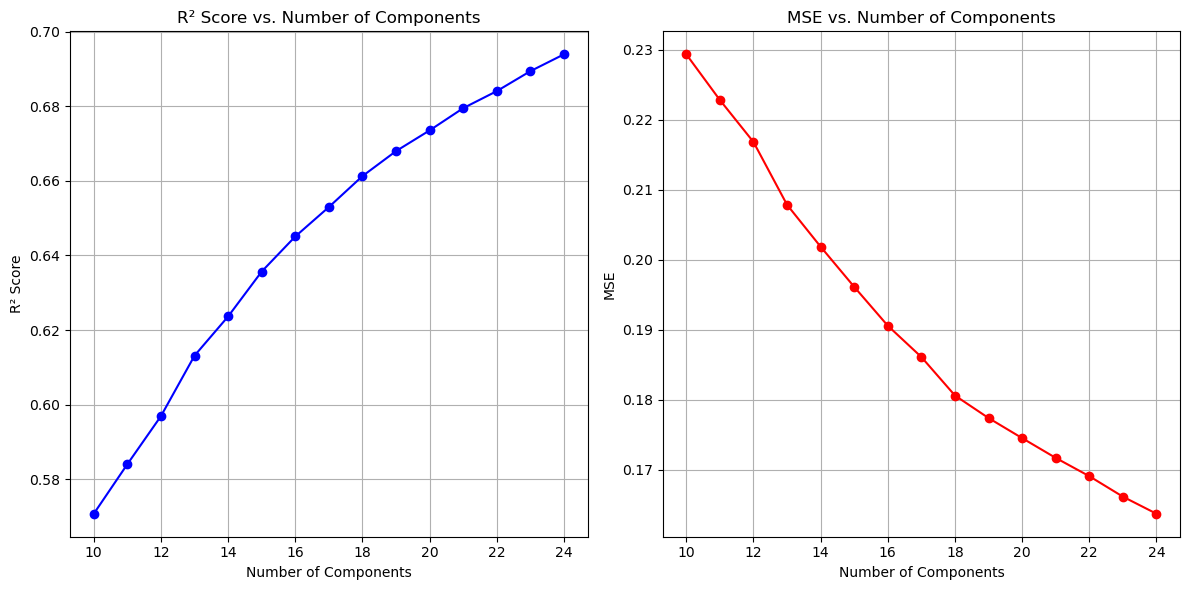

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'features' and 'betas' are your datasets
# X = features.numpy()  # Convert to numpy if not already
X = ft
Y = bets

# Lists to store the metrics
r2_scores = []
mse_scores = []
component_range = range(10, 25)  # Adjust the range based on your dataset and needs

for n_components in component_range:
    pls = PLSRegression(n_components=n_components)
    pls.fit(X, Y)
    Y_pred = pls.predict(X)
    
    # Calculate metrics
    r2 = r2_score(Y, Y_pred)
    mse = mean_squared_error(Y, Y_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(component_range, r2_scores, marker='o', linestyle='-', color='b')
plt.title('R² Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(component_range, mse_scores, marker='o', linestyle='-', color='r')
plt.title('MSE vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()
